# Principal Component Analysis

------------------------------------------------------
*Machine Learning Course*

*Master in Information & Health Engineering*

*Vanessa Gómez Verdejo vanessa@tsc.uc3m.es and Pablo M. Olmos olmos@tsc.uc3m.es*

------------------------------------------------------


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

%matplotlib inline
%config InlineBackend.figure_format = 'retina'   ##QUALITY FIGURES!!
plt.rcParams["figure.figsize"] = [8,8]

## Feature extraction and dimensionality reduction: Motivation

Imagine you are a scientist studying the stars in the night sky. To make sense of the vast, complex celestial landscape, you might use a telescope to observe the positions and characteristics of stars. However, the night sky is not a flat, two-dimensional canvas but rather a three-dimensional space with stars scattered at various depths. To analyze and understand this three-dimensional reality, you would likely want to project the information onto a two-dimensional plane, like a star map, to identify patterns and relationships among the stars more easily.

In the world of data analysis, a similar challenge often arises. We deal with complex datasets containing numerous variables, and understanding the underlying structures within the data can be a formidable task. This is where Feature Extration comes into play.



<img align="center" src="http://www.tsc.uc3m.es/~emipar/NOTEBOOKS/PCA_ML_health/pca1.png" width="70%" >

In this sense, the goal of **feature extraction** methods is to transform high-dimensional data into a lower-dimensional representation, making it easier to visualize, interpret, and analyze. It is an essential tool in the fields of statistics, data science, machine learning, and various other disciplines. The key motivation behind it is to identify and capture the most important patterns, relationships, and variations in data, simplifying the complexity and providing invaluable insights.


  <img align="center" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/FE_intro.jpg" width="40%" >

So, these methods provide a dimensionality reduction while at the same time:
* Use only relevant data, i.e, remove irrelevant/noisy/correlated components minimizing the loss of *relevant* information
* Discover good combinations of input variables (feature engineering).

These characteristics allow us to simplify the ML stage since:
* We reduce the number of parameters in the classifier (alliviating the *curse of dimensionality*)
* We can get to *bend* the input space to better fit our task
* We obtain a compact data representation (crucial for large datasets)

 In this section we are going to focus on the best known model for dimensionality reduction called PCA, which performs a linear transformation of the input variables to project the data onto the directions of highest variance.


## Some notation

Consider we have a dataset with $N$ observations where each data, $\mathbf{x}^{(n)}\in\mathbb{R}^D$, belongs to a $D$ dimensional space. That is, each data is a column vector with $D$ elements:
$$
{\bf x} = \left[ \begin{array}{c}x_1\\ \vdots\\ x_D \end{array}\right].
$$ Besides, for the sake of simplicity, let's consider that these data have zero mean.

On the other hand, for each data, we are going to find a new representation ${\bf x^\prime}$ in a lower dimensional space ($K<D$):
$$
{\bf x^\prime} = \left[ \begin{array}{c}x^\prime_1 \\ \vdots \\ x^\prime_{K} \end{array}\right].
$$

If this new data representation results from the application of a linear transformation to the original data it can be defined by:
$$ {\bf x^\prime} = {\bf U}^\top {\bf x}^\top$$

where ${\bf U}$ is a transformation matrix of size $D\times K$:
$${\bf U}=\left[ \begin{array}{ccc}
u_{1,1} \ldots u_{1,K}\\
\vdots \ddots \vdots\\
u_{D,1} \ldots u_{D,K}\\
\end{array}\right] $$

The goal of the **feature extraction** algorithm is to write and solve an optimization problem that finds out the correct transformation matrix ${\bf U}$.





## 2.2. Principal Component Analysis (PCA)

**Principal Component Analysis** can be one of the most mentioned and known data analysis method. It’s probably the most advised preprocessing step.

PCA goal is to obtain a new, reduced  set of $K<D$ orthogonal variables, the so-called principal components that maximize the variance contained in the data. The principal components are linear combinations of the input variables, but sorted in decreasing order of variance.

<img src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/PCA_1.png" width="40%" >

In matrix notation, the purpose of PCA can be written as finding a projection matrix ${\bf U}$ able to transform the $D\times N$ data matrix ${\bf X}$ into the $K \times N$ matrix ${\bf X'}$:

$$ {\bf X'} = {\bf U}^\top {\bf X}^\top$$

so that the variance contained in the data is maximized. Each column of the matrix ${\bf U}$ is a **principal component**, and it will provide a new dimension of the data in the projected space: the principal components act as a vector basis in the projected space.

PCA is **unsupervised**, one does not need targets to compute PCA!!






## 2.1 Mathematical formulation

$$ {\bf U} = \underset{\bf U} {\mathrm{argmax}} ~{\rm Tr} \left\lbrace {\bf U}^T {\bf X}^T {\bf X} {\bf U}\right\rbrace  = \underset{\bf U} {\mathrm{argmax}} ~{\rm Tr}\left\lbrace {\bf U}^T {\bf C_{XX}} {\bf U}\right\rbrace $$
$$ {\rm s.t.} ~~{\bf U}^T {\bf U}={\bf I}$$

**Solution:**

Let's start considering the projection onto a one-dimensional space ($K = 1$). So, we want to solve the following optimization problem:

$$ {\bf u}_1 = \underset{{\bf u}_1} {\mathrm{argmax}} ~{\bf u}_1^{\top} {\bf C_{XX}} {\bf u}_1 $$
$$ {\rm s.t.} ~~{\bf u}_1^{\top} {\bf u}_1=1$$

  If we apply Lagrange multipliers, we can include the constraint into  functional by means of the lagrange multiplier $\lambda_1$ and we arrive to an unconstraint problem

$$ {\bf u}_1 = \underset{{\bf u}_1} {\mathrm{argmax}} ~{\bf u}_1^{\top} {\bf C_{XX}} {\bf u}_1 + \lambda_1 \left(1-{\bf u}_1^{\top} {\bf u}_1 \right)$$

by making its derivate equal to zero, we obtain that the optimum solution has to satisfiy

$${\bf C_{XX}} {\bf u}_1 = \lambda_1 {\bf u}_1 $$

which indicates that ${\bf u}_1$ must be an eigenvector of the covariance matrix ${\bf C_{XX}}$ and $\lambda_1$ is its associated eigenvalue.

Besides, if we left-multiply this expression by ${\bf u}_1^{\top}$ and make
use of ${\bf u}_1^{\top} {\bf u}_1=1$, we obtain that

$${\bf u}_1^{\top} {\bf C_{XX}} {\bf u}_1 = \lambda_1 $$

that is, the variance of the projected data by the eigenventor ${\bf u}_1 $ is equal to its associated eigenvalue $\lambda_1$. So, we can get the maximum projected variance, with a single projection, if we set this first principal component ${\bf u}_1$ as the eigenvector with the largest eigenvalue $\lambda_1$. Later, we can define additional principal components in an incremental fashion by choosing each new direction as the one eigenvector with the next highest eigenvalue so that the projected variance is maximized.

So, we can obtain the first $K$ projections of the PCA algorithm by solving the following eigenvalue problem

$$ {\bf C_{XX}} {\bf u} = \lambda {\bf u} $$

So, the projection matrix, $\bf U$, consists of the first eigenvectors of $\bf  C_{xx}$ (i.e., those associated with largest eigenvalues)

$$ {\bf U} = {\rm eigs}({\bf C_{XX}}) $$


## 2.2 PCA algorithm

* **Input**: $\bf X$ ($D\times N$) data matrix, each datum is a column

* **Process**:

    1.- $\mathbf m = {1\over N} \sum_{n=1}^N{\mathbf x^{(n)}}$

    2.- $\bf C_{XX} = {1\over N} \sum_{n=1}^N{(\mathbf x^{(n)} - \mathbf m)(\mathbf x^{(n)} - \mathbf m)}^\top$

    3.- $\bf U,\Lambda = \mbox{eig}(C_{XX})$
    
    4.- $\mathbf X^\prime = (\bf U_{:K})^\top \mathbf X$

* **Output**: Transformed data $\mathbf X^{\prime}$

where eig($\bf A$) is a function that returns the eigenvectors (columns of $\bf U$) and eigenvalues (diagonal of $\Lambda$) of $\bf A$ and $\bf U_{:k}$ means the first $k$ columns of matrix $\bf U$.


**REFERENCE**

Jollife I.T. (1986) Principal Component Analysis. Springer-Verlag.

## 2.3 PCA explains variance

- Each Principal Component **explains an amount of the total variance contained in the data set** equal to the size of the corresponding eigenvalue of $\bf C_{XX}$. Notice the trace of $\bf C_{XX}$ (sum of the variances) is the total variance contained in the data and that the sum of the eigenvalues is equal to the trace of a matrix.

- In this sense, the projection of the data on the subset of the first $K$ principal components is the **best reconstruction** of these data with just $K$ components in the sense of maximizing the variance captured by the reconstruction.

- If the data lies in a **subspace of rank $K<D$**, then the first $K$ principal components are a basis for that subspace and the data is lossless compressed in $K$ components. By lossless we mean without loss of information as these $K$ principal components capture all the variance present in data.

- If the data contains **small amounts of noise**, usually the noise components would reflect in eigenvalues with smaller values, thus removed by throwing away the less principal components.

## 2.4. Let's play with data

This section presents some experimental work over a face detection problem where you will be able to test the performance improvements provided by the feature extraction process. Besides, from a qualitative point of view, you will analyze the extracted features by plotting the eigenvectors defining the feature extraction process.

Later, we will analyze the discriminatory capability of the extracted features with a linear SVM classifier. To implement the different approaches we will build on the [Scikit-Learn](http://scikit-learn.org/stable/) python toolbox.


### 2.4.1. Download and prepare the data

This dataset consists of ten different images taken from 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement).
    
The next code includes the lines to download this data set and create the training, validation and test data partitions, as well as normalize them.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler


###############################################################################
# Download the data, if not already on disk and load it as numpy arrays
print('The first time that you download the data it can take a while...')
olivetti_people = fetch_olivetti_faces()

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = olivetti_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = olivetti_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
Y = olivetti_people.target
n_classes = np.unique(Y).shape[0]

print("Dataset size information:")
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


###############################################################################
# Preparing the data

# Initialize the random generator seed to compare results
np.random.seed(1)

# split into a training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

# Normalizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Number of training samples: %d" % X_train.shape[0])
print("Number of test samples: %d" % X_test.shape[0])

The first time that you download the data it can take a while...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Dataset size information:
n_features: 4096
n_classes: 40
Number of training samples: 300
Number of test samples: 100


### Representing some example faces

Next cells include the `plot_gallery( )` function, which let you plot any of the face images from the data set and in later sections plot the eigenvectors provided by the feature selection process. Besides, as an example, the function is used to plot some training data.

In [4]:
import matplotlib.pyplot as plt
def plot_gallery(images, titles, h, w, n_row=4, n_col=10):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(images.shape[0]):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.colorbar()
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

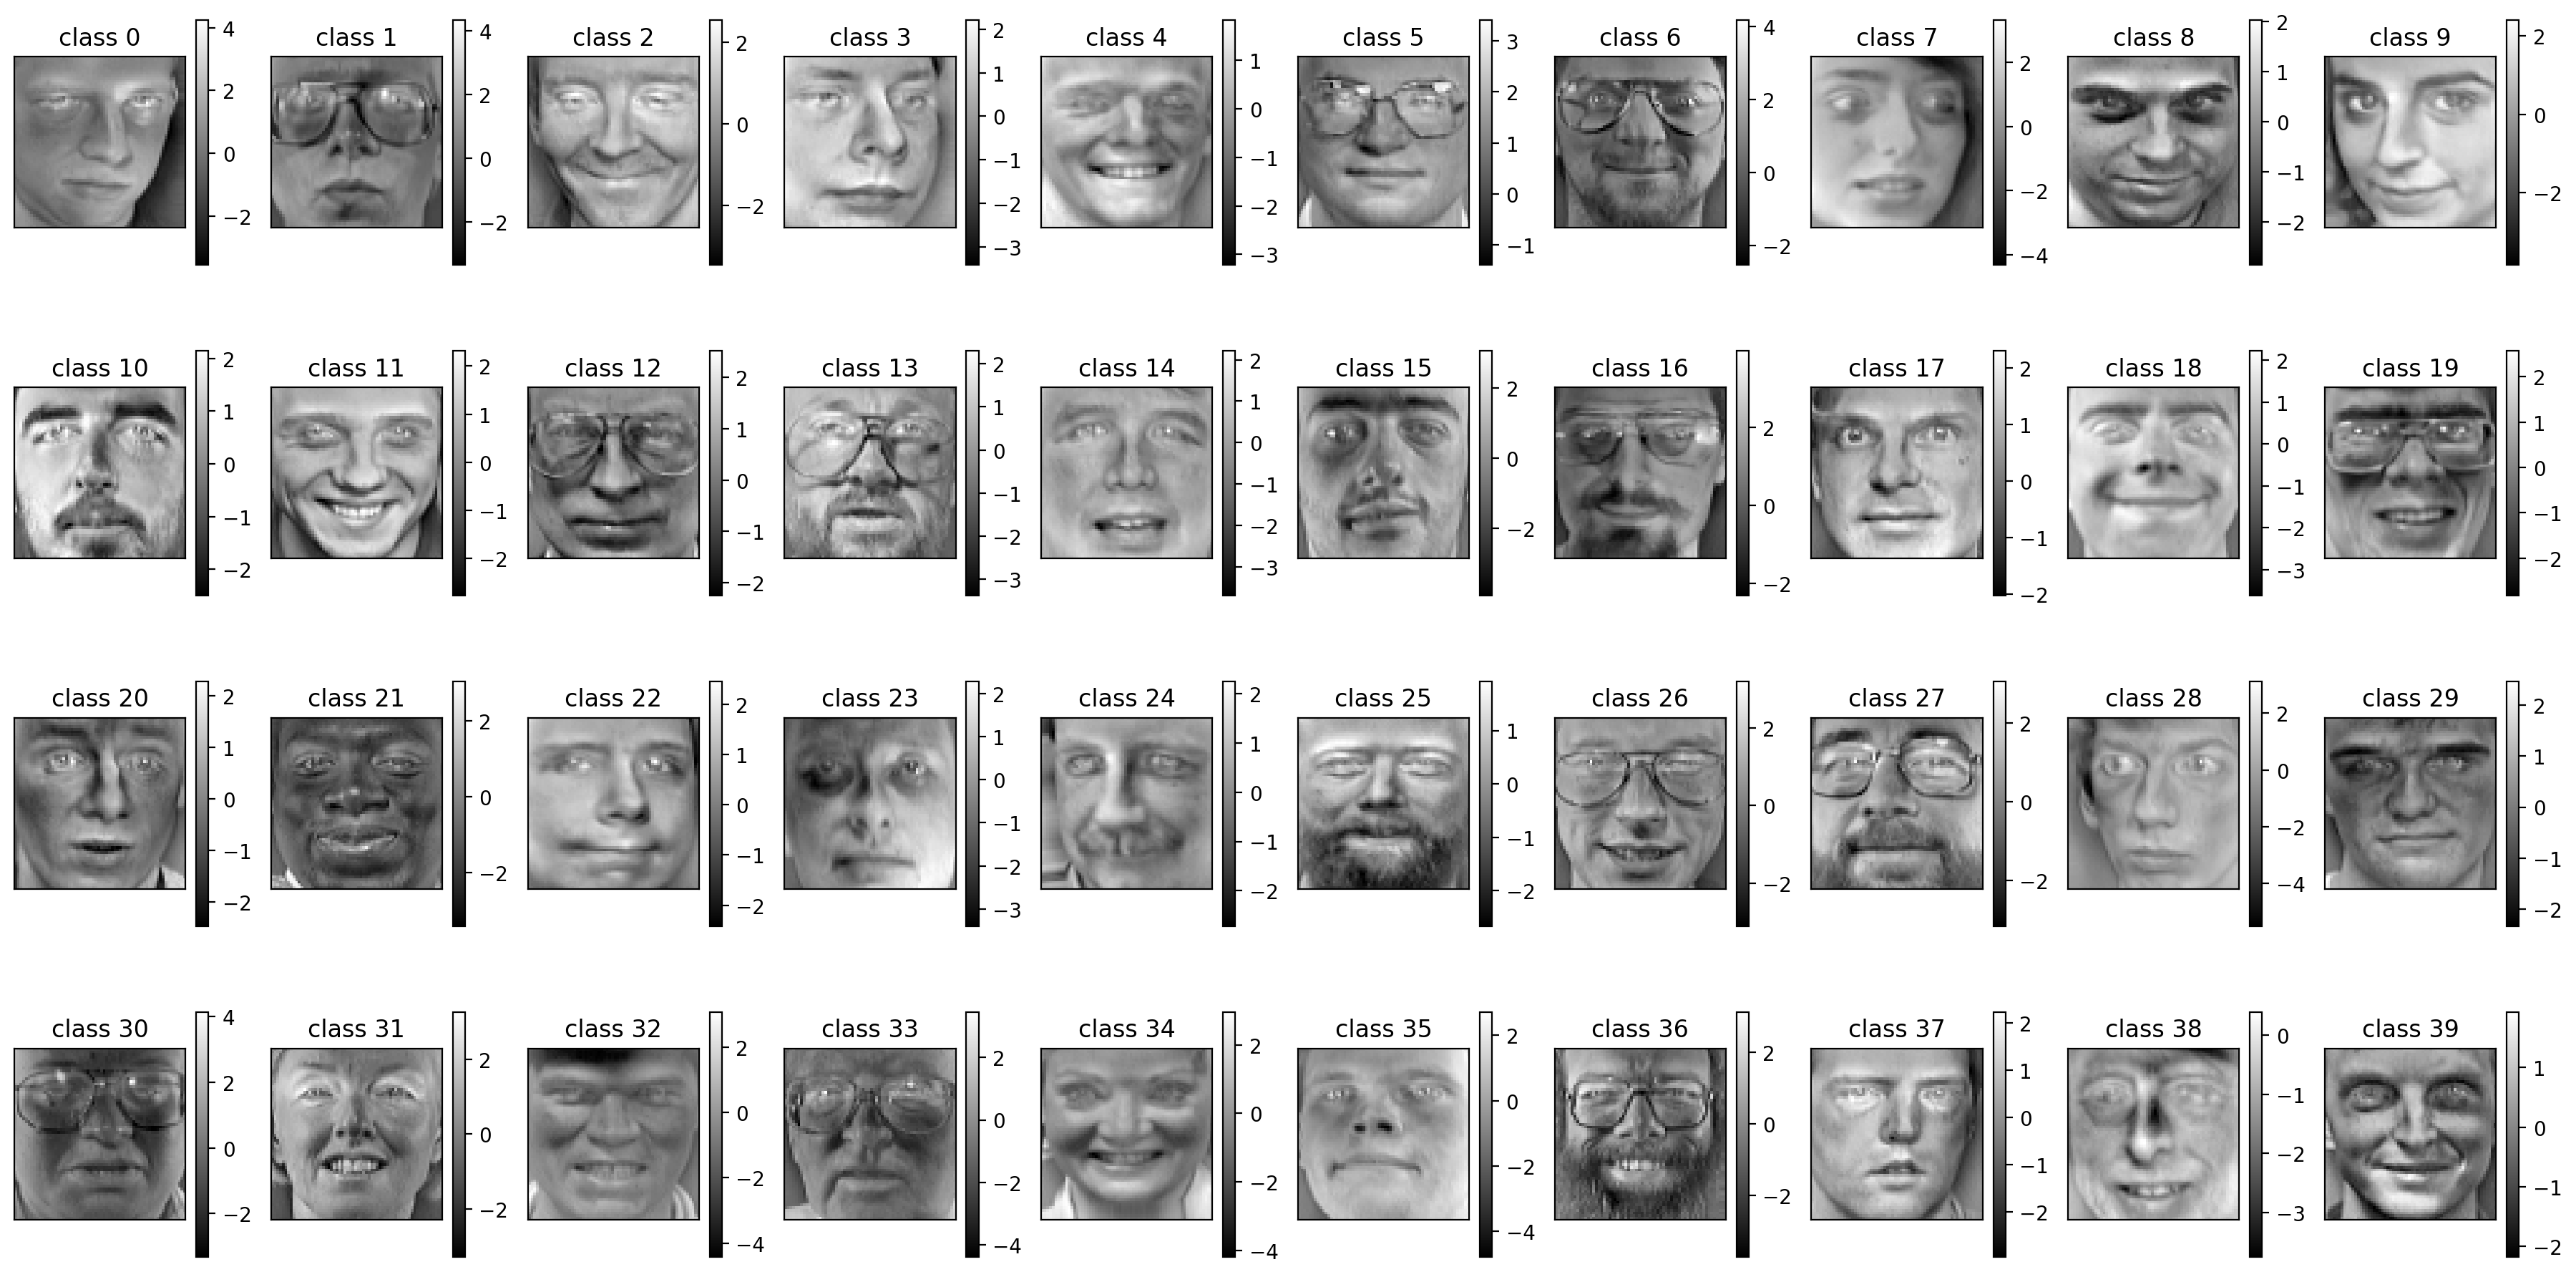

In [5]:
# As example, we plot a face of each class (or person)
set_classes = np.unique(Y_train)
titles = ['class '+str(c) for c in set_classes]
ind_faces = [np.where(Y_train == c)[0][0] for c in set_classes]

plot_gallery(X_train[ind_faces,:], titles, h, w)

### 2.4.2. Feature extraction with PCA


#### Exercise 3

Here, let's use the [PCA( )](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) method to find the projections maximizing the variance of the projected data. Complete next cell to obtain:
* The first 100 projection vectors from the training data.
* The projections of training and test data in this new space.
* The dimensions (number of data and number of features) of the projected data.

Use the methods `.fit( )`, `.fit_transform( )` and `.transform( )` of the pca object to solve the exercise.


#### SOLUTION 3

In [6]:
from sklearn.decomposition import PCA

N_feat_max=100

# <SOL>
my_pca = PCA(n_components=N_feat_max).fit(X_train)
P_train = my_pca.transform(X_train)
P_test = my_pca.transform(X_test)

dim_train = P_train.shape[1]
dim_test = P_test.shape[1]

# </SOL>

print('Dimensions of training data are: ' + str(dim_train))
print('Dimensions of test data are: ' + str(dim_test))

Dimensions of training data are: 100
Dimensions of test data are: 100


### 2.4.3 Analyzing eigenvectors and eigenvalues

The analysis of eigenvectors in face detection problems is quite common, in fact, they are known as **eigenfaces**. Note that each feature of each transformed instance is the scalar product between the corresponding input face and the corresponding eigenface. Lighter regions of the eigenfaces will contribute positively to generate the new feature, whereas darker regions will contribute negatively.

On the other hand, the **eigenvalues** allow us to know the importance of each principal component (the higher the eigenvalue, the more important the component). Analyzing the eigenvalues we can know which components are the most relevant and, even, know which are unnecessary and how many new variables we can use without a great loss of information.

Execute the following code cells to plot the first eigenvectors and the evolution of the eigenvalues.

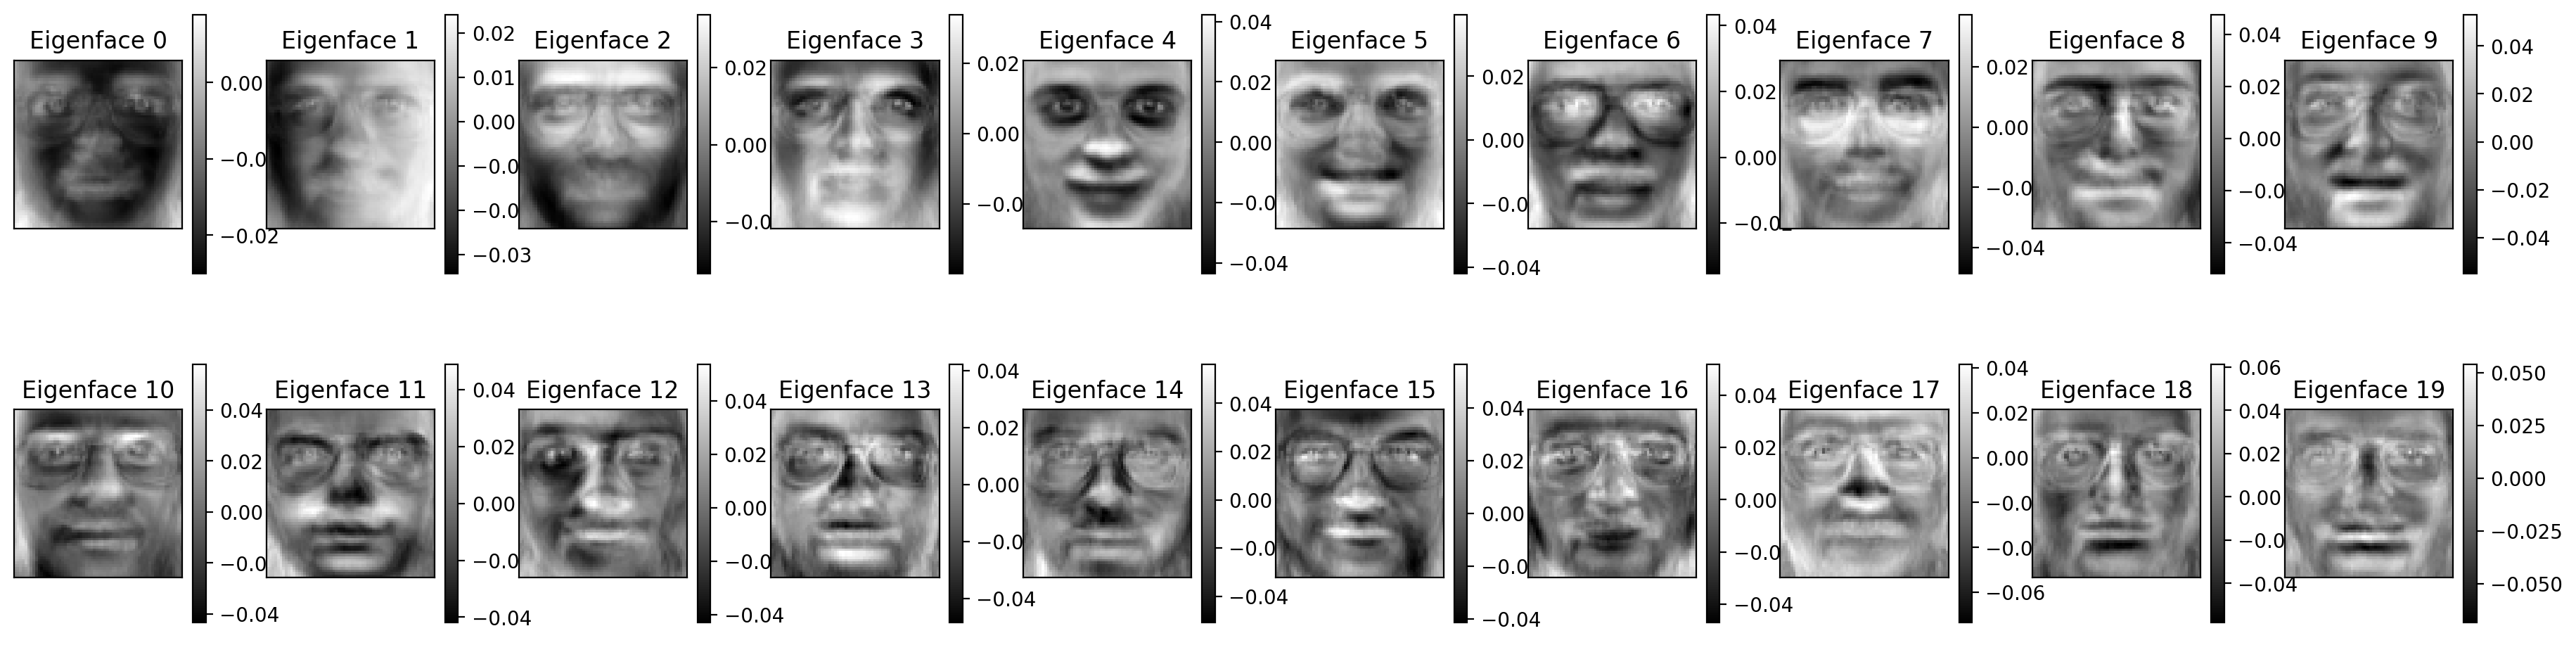

In [7]:
# Plot eigenfaces
n_eigenfaces=20
titles = ['Eigenface '+str(num) for num in range(n_eigenfaces)]
eigenfaces = my_pca.components_.reshape((N_feat_max, h, w))
plot_gallery(eigenfaces[:n_eigenfaces,:,:], titles, h, w, n_row=2, n_col=10)

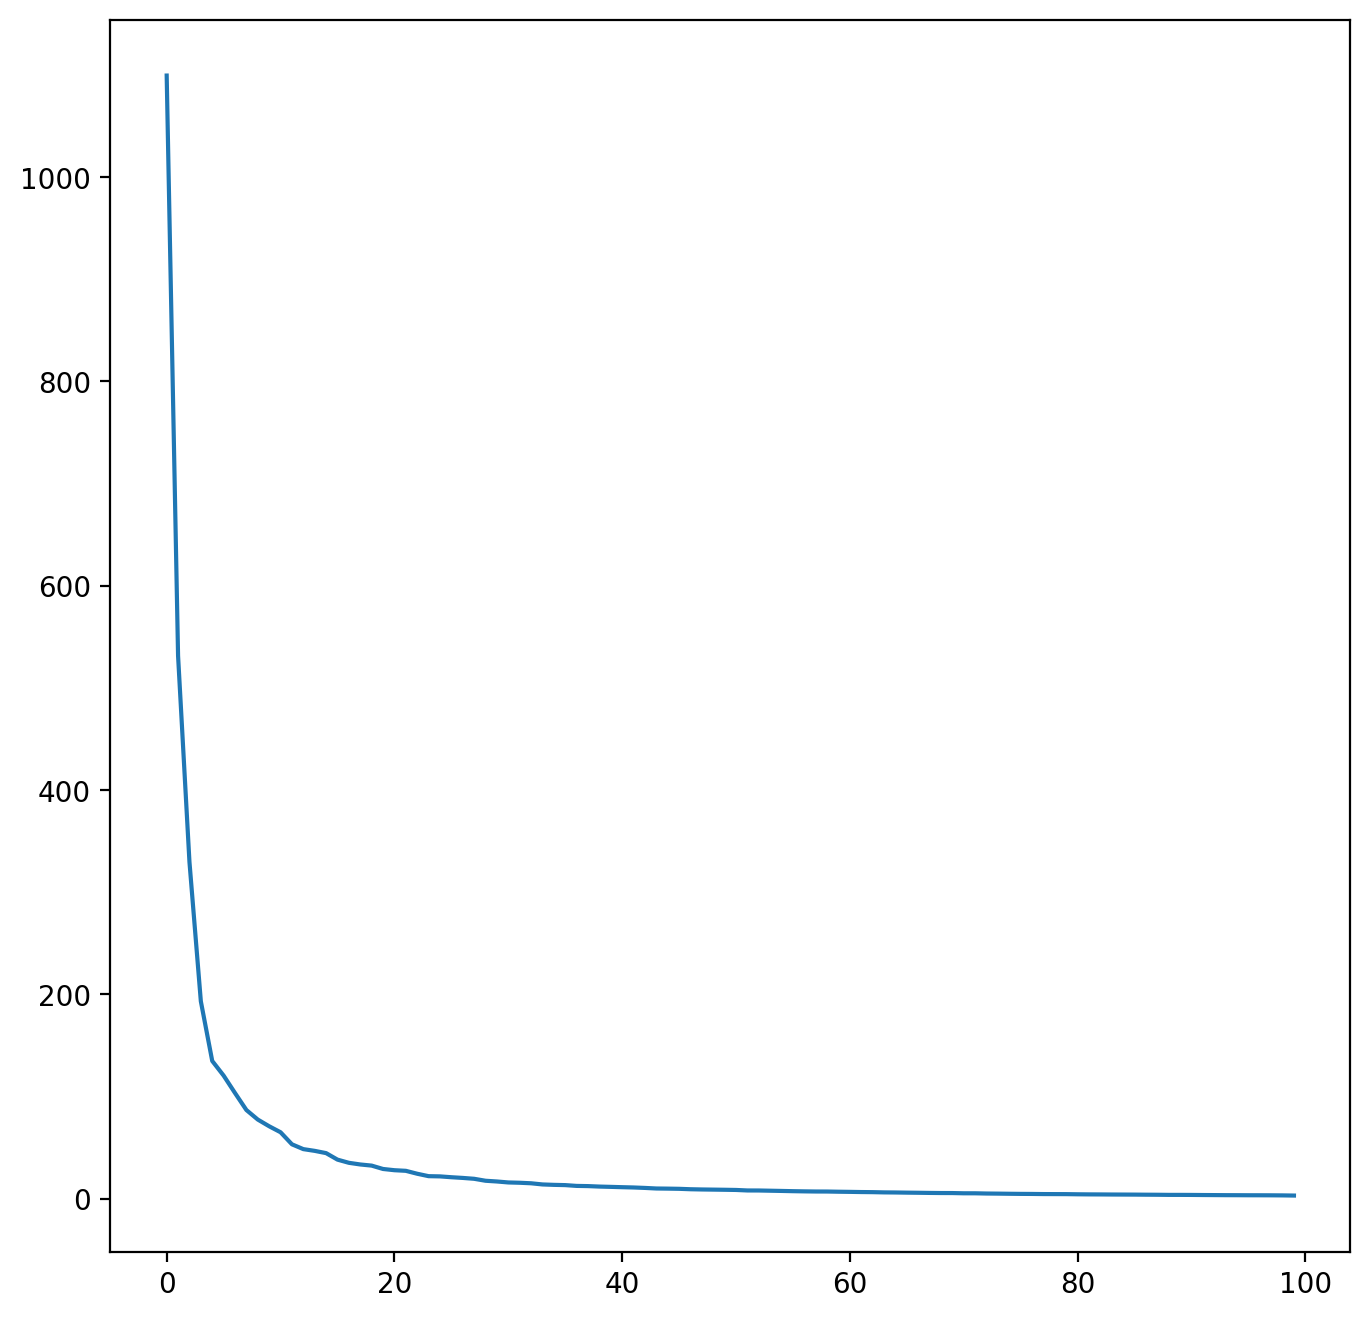

In [8]:
# Analyze eigenvalues
eigenvalues = my_pca.explained_variance_
plt.figure()
plt.plot(eigenvalues, label='Evolution eigenvalues')
plt.show()

In view of this figure, how many principal components do you think are sufficient to get a good representation of the data and not lose relevant information?

Text(0, 0.5, 'Percentage of the variance')

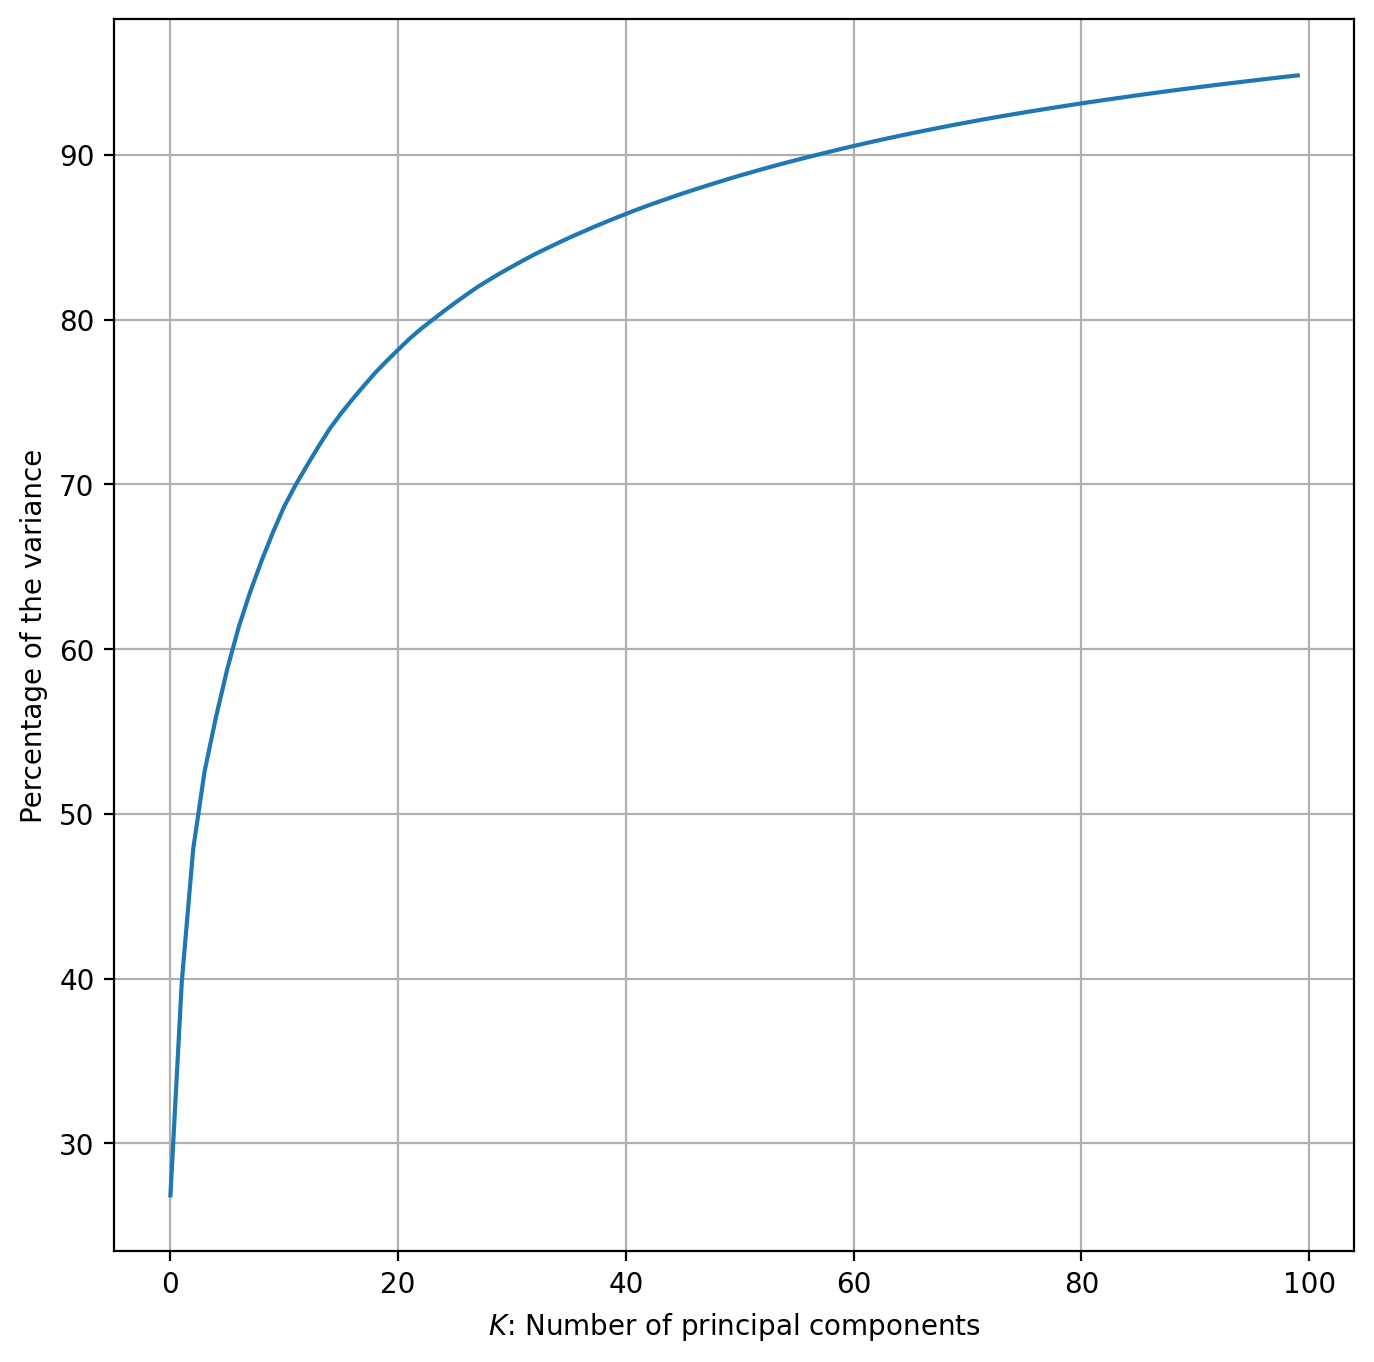

In [9]:
# 1.- Compute an estimation of the variance in data using the training set

data_variance = np.sum(np.var(X_train,0))

# 2.- plot the cummulative sum of the sorted eigenvalues divided by the total variance of the data
# 2.1.- express the y-axis in percentage
plt.figure()
plt.plot(100*np.cumsum(eigenvalues)/data_variance, label='Evolution eigenvalues')
plt.grid()
plt.xlabel('$K$: Number of principal components')
plt.ylabel('Percentage of the variance')

### 2.4.4 Dimensionality reduction

The main advantage of PCA lies in the fact that it allows us to reduce the dimensionality of the data. We can even summarize the input data into only 2 or 3 new features that can be used to visualize the data.

The next code cell shows how we can use 2 or 3 of the new features to represent the data of our data set.

Text(0, 0.5, 'Extracted Feature 2')

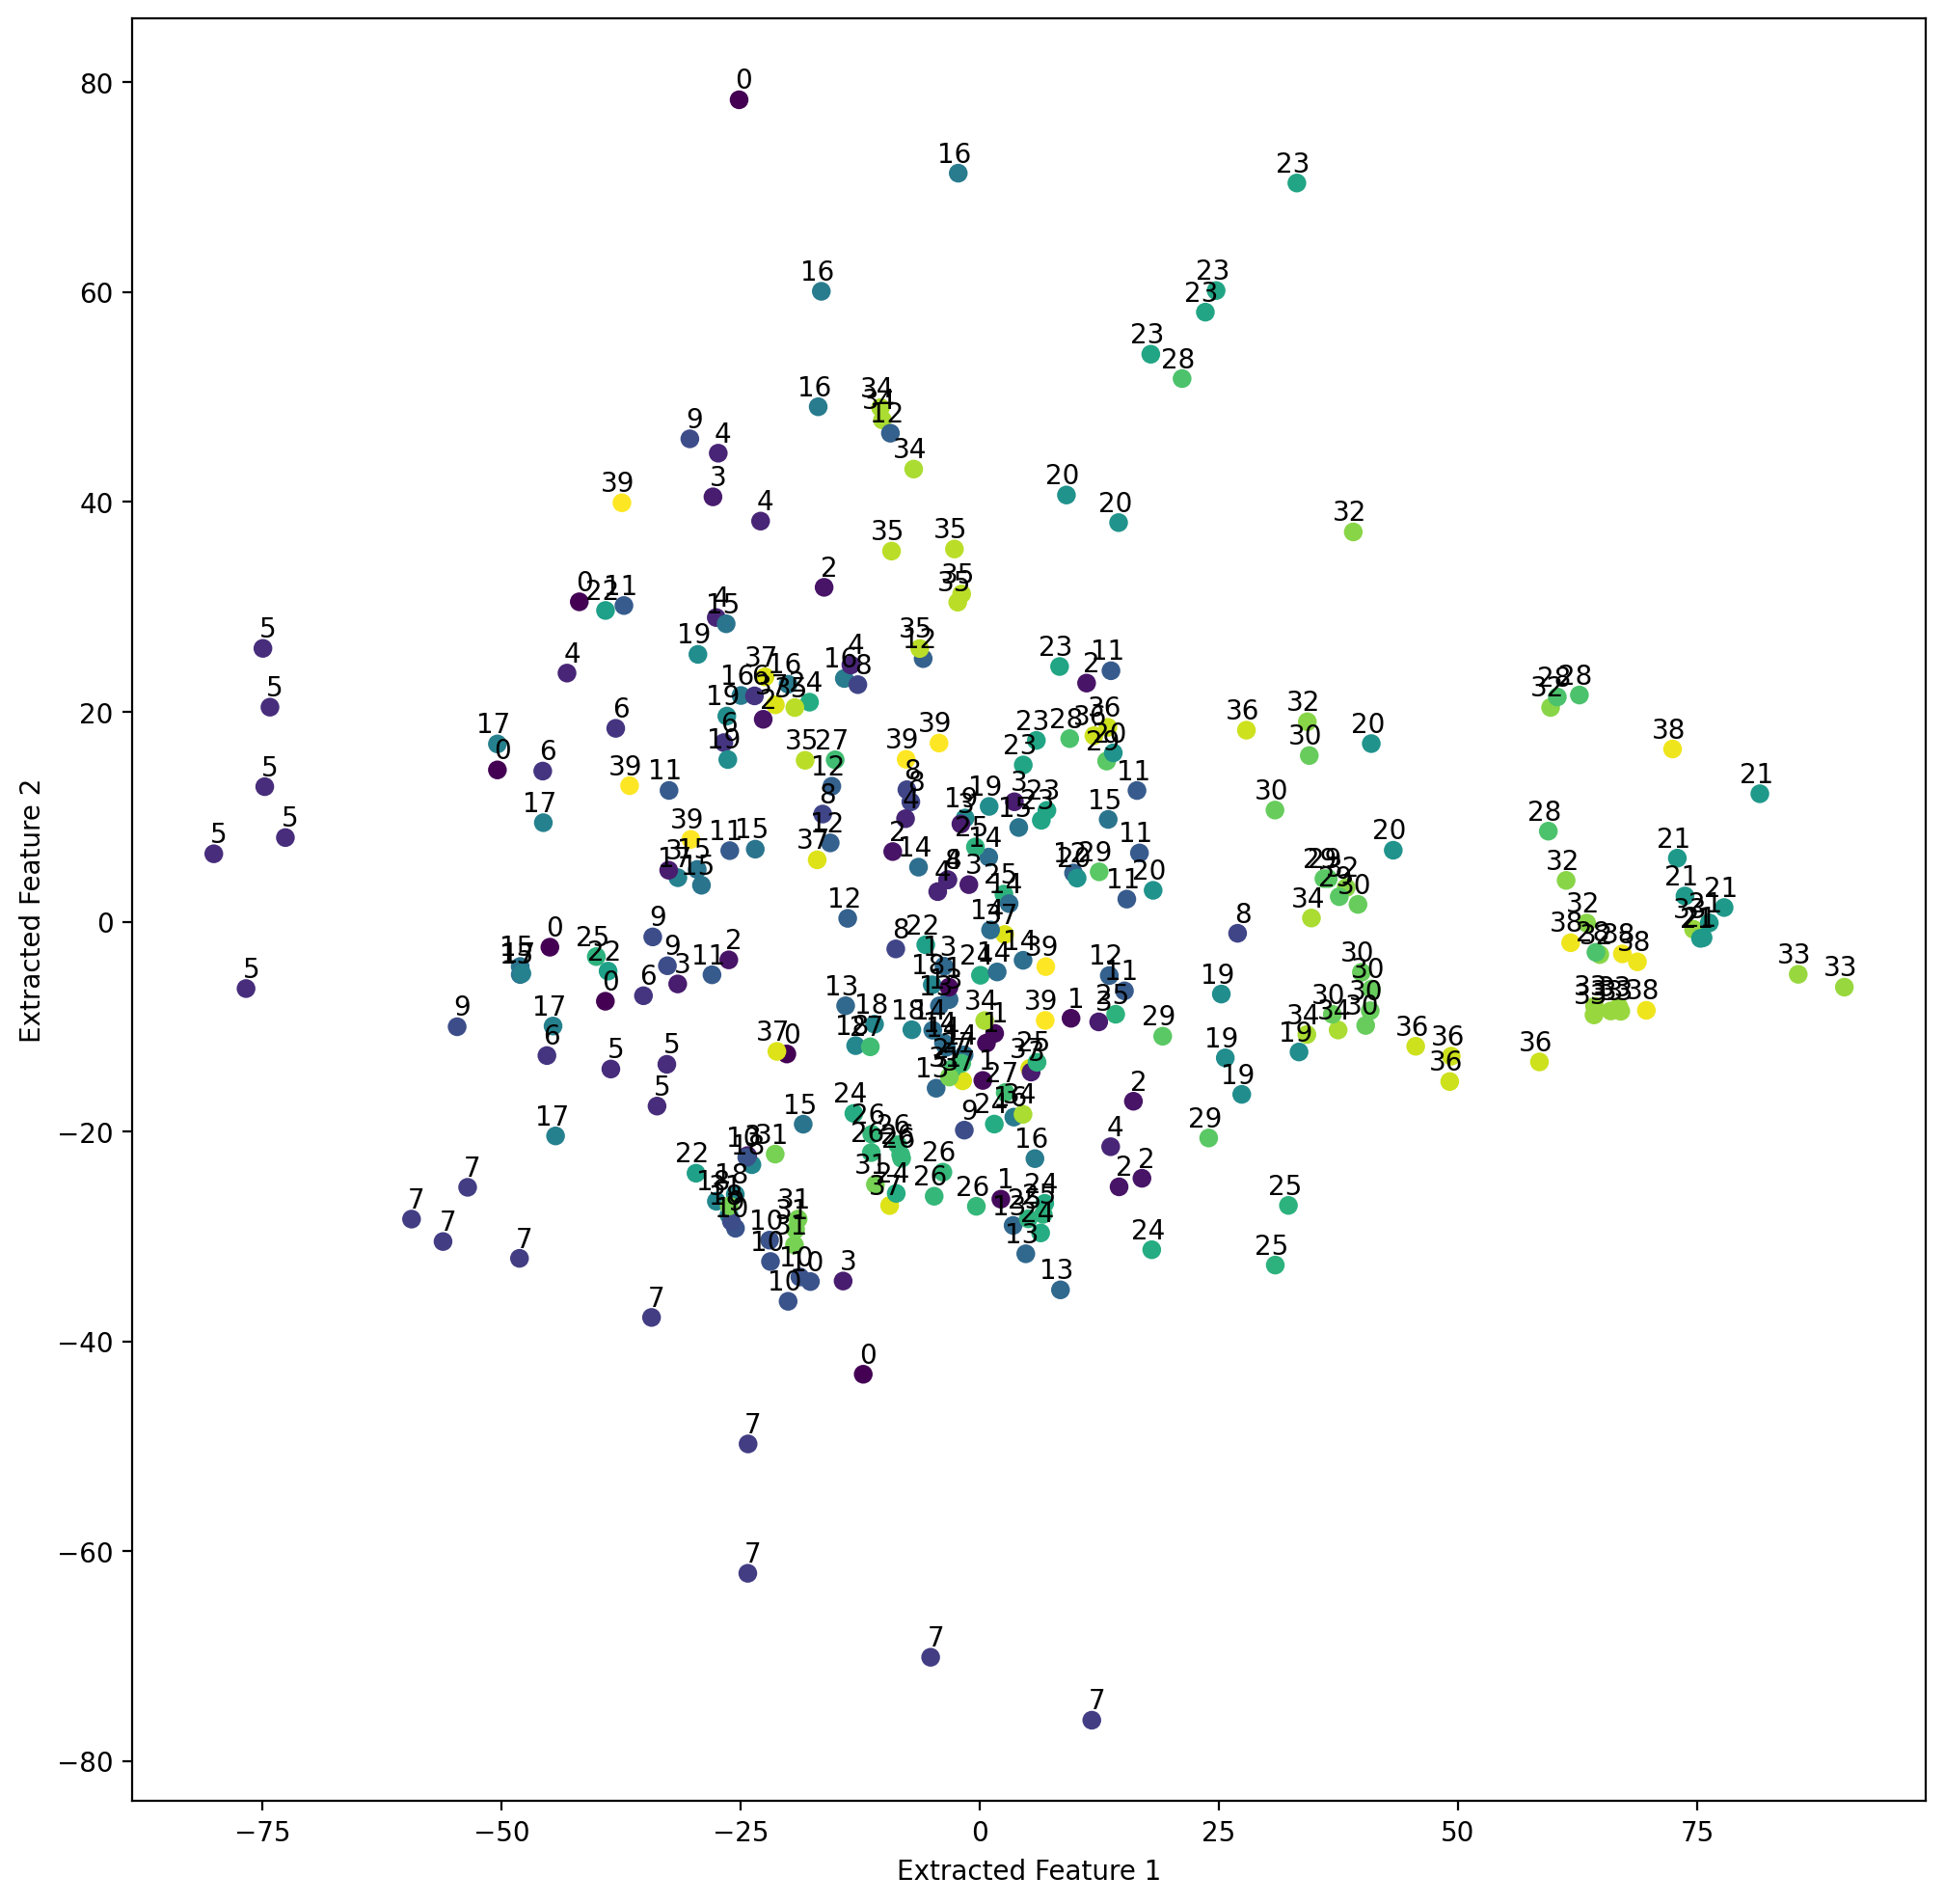

In [10]:
X_train_pca2 = P_train[:,:2]
plt.figure(figsize=(12,12))
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=Y_train)

for i in range(len(X_train_pca2)):
        plt.annotate(Y_train[i],
                     xy=(X_train_pca2[i,0], X_train_pca2[i,1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.xlabel('Extracted Feature 1')
plt.ylabel('Extracted Feature 2')

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from pylab import figure

X_train_pca3 = P_train[:,:3]
fig = figure(figsize=(12,12)) #plt.figure(figsize=(12,12))
ax = Axes3D(fig)
ax.scatter(X_train_pca3[:, 0], X_train_pca3[:, 1], X_train_pca3[:, 2], c=Y_train)

for i in range(len(X_train_pca3)):
  ax.text(X_train_pca3[i,0], X_train_pca3[i,1], X_train_pca3[i,2],  '%s' % (str(Y_train[i])), size=10, zorder=1,  color='k')

ax.set_xlabel('Extracted Feature 1')
ax.set_ylabel('Extracted Feature 2')
ax.set_zlabel('Extracted Feature 3')
plt.show()

<Figure size 1200x1200 with 0 Axes>

### 2.4.5 Reconstruction from the principal components

The Principal Components form a basis that capture the most relevant information within data. Therefore, we can reconstruct the original data as a linear combination of the principal components, precisely weighted by the coordinates of the mapped data in the transformed space:

$$
\hat{\mathbf x} =  \bf U_{:K} \mathbf x^\prime
$$

The reconstruction error can be computed as
$$
\sqrt{(\mathbf x-\hat{\mathbf x})^\top (\mathbf x-\hat{\mathbf x})} =
\sqrt{\mathbf x^\top (\mathbb I - \bf U_{:K}\bf U_{:K}^\top)\mathbf x}
$$

The following cell plots the result of reconstructing one of the original images with a different number of principal components.

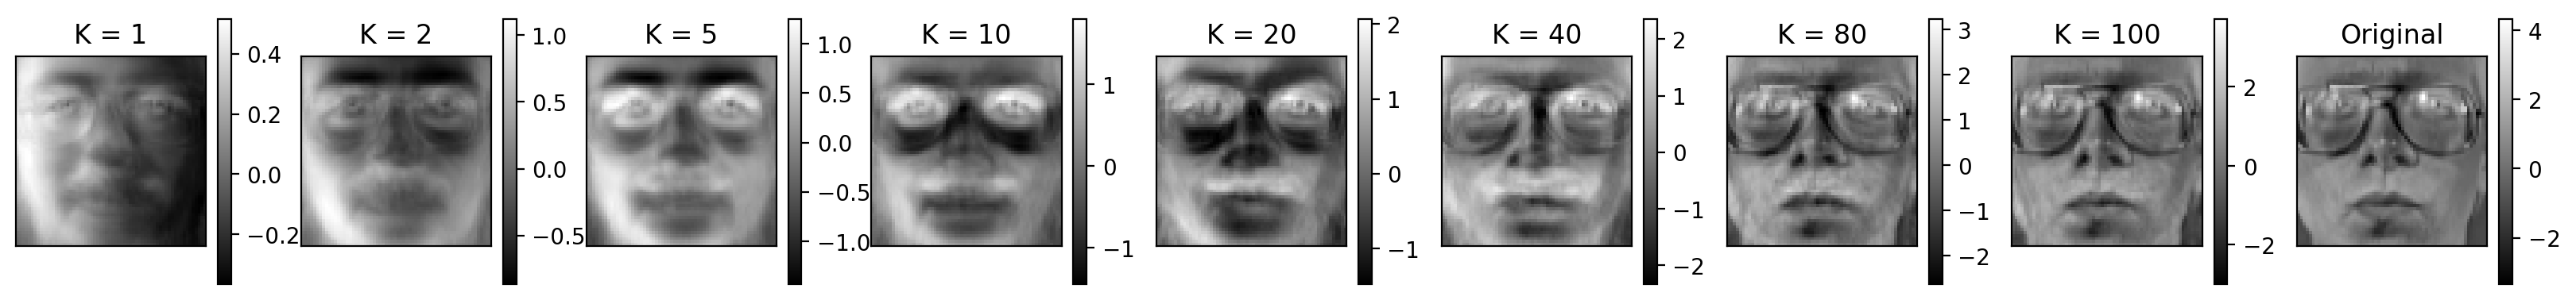

In [12]:
subject=27
D = X_train.shape[1]
n_reconst_list=[1,2, 5, 10, 20, 40, 80,  100] # Number of Principal Components
Reconstruct = np.empty((len(n_reconst_list)+1, D))

for ii,n_comp in enumerate(n_reconst_list):
    # Reconstruct image subjet using n_comp PCs
    Reconstruct[ii,:] = P_train[subject,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])

# Original Image
Reconstruct[-1,:] = X_train[subject,:].copy()
titles = ['K = '+str(num) for num in n_reconst_list] + ['Original']
Reco = Reconstruct.reshape((len(n_reconst_list)+1, h, w))

plot_gallery(Reco, titles, h, w, n_row=6, n_col=10)


Now let's plot the evolution of the average reconstruction error for the whole training, validation and test sets (one curve per set) as a function of the number of PC used for the reconstruction


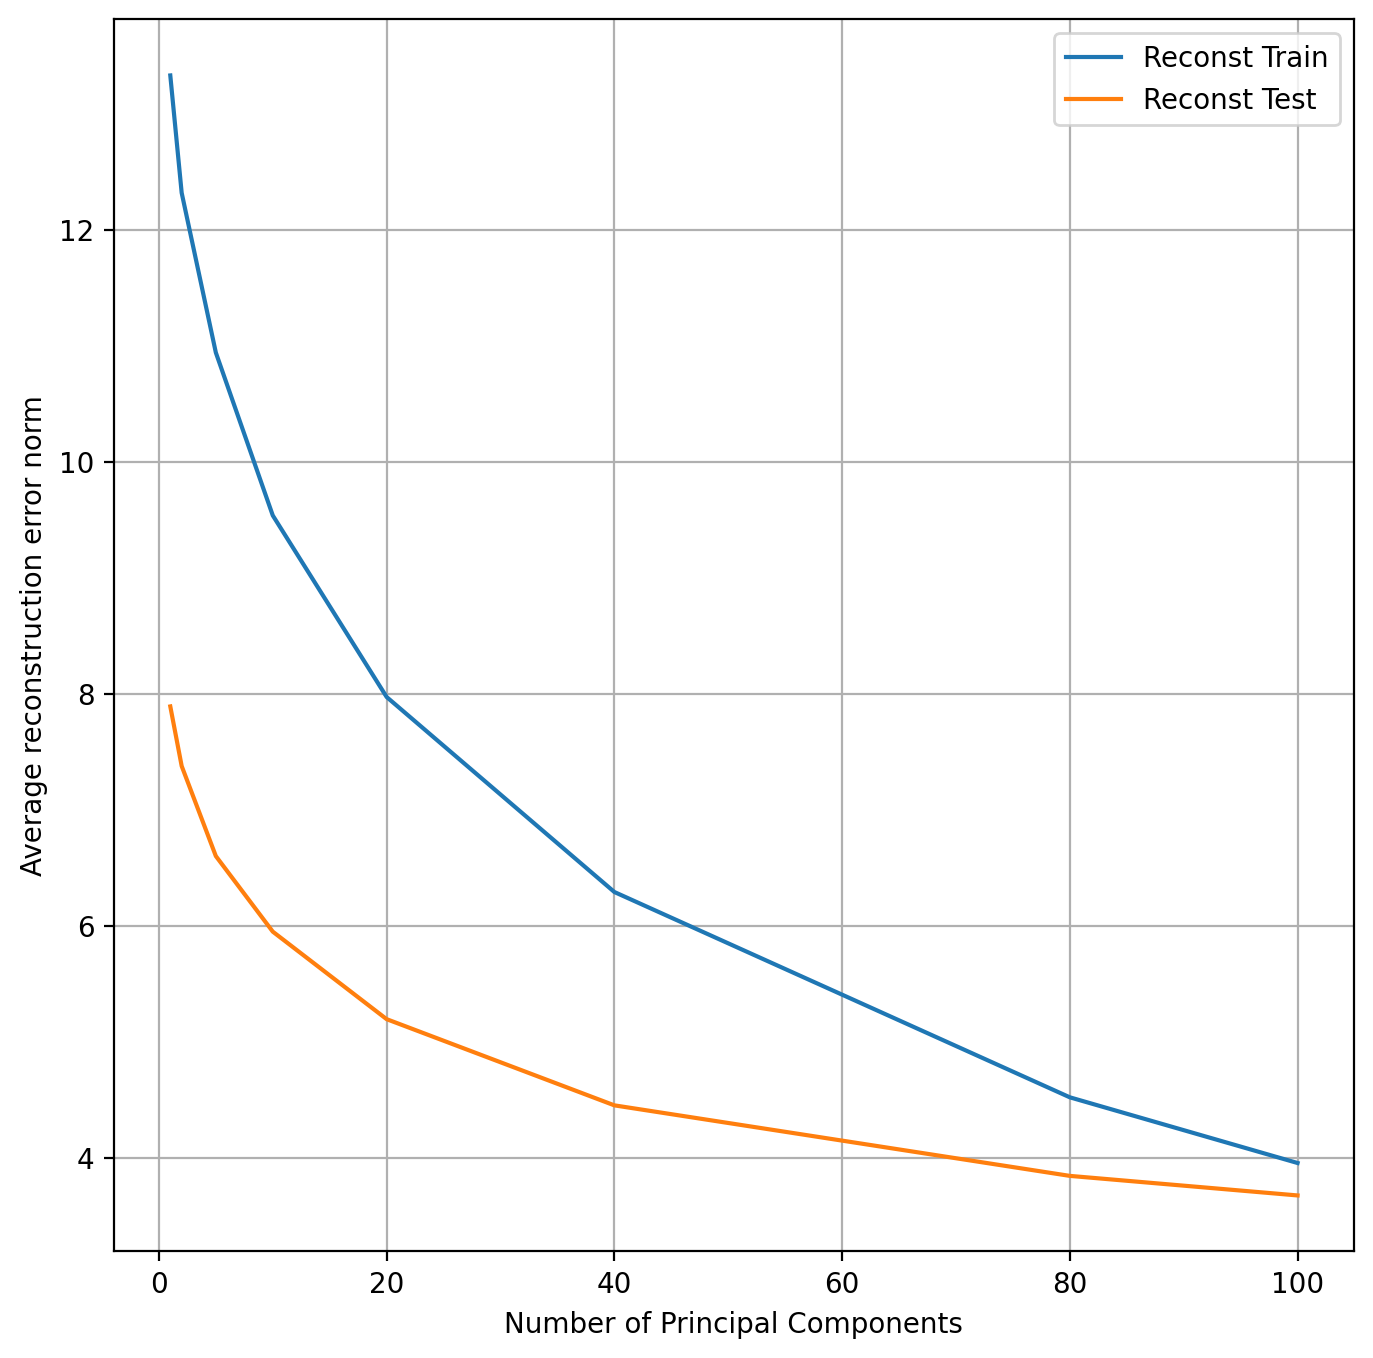

In [13]:
n_reconst_list=[1,2, 5, 10, 20, 40, 80,  100]
error_train = np.empty(len(n_reconst_list))
error_val = np.empty(len(n_reconst_list))
error_test = np.empty(len(n_reconst_list))

for ii,n_comp in enumerate(n_reconst_list):
    Reconstruct_train = P_train[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_train[ii] = np.mean(np.linalg.norm(X_train-Reconstruct_train,axis=0))
    Reconstruct_test = P_test[:,0:n_comp+1].dot(my_pca.components_[0:n_comp+1,:])
    error_test[ii] = np.mean(np.linalg.norm(X_test-Reconstruct_test,axis=0))

plt.figure()
plt.plot(n_reconst_list, error_train, label='Reconst Train')
plt.plot(n_reconst_list, error_test, label='Reconst Test')
plt.xlabel('Number of Principal Components')
plt.ylabel('Average reconstruction error norm')
plt.grid()
plt.legend()

### 2.4.6 Performance evaluation

In this section you will use a K-NN to evaluate the discriminatory capability of the extracted features.

#### Exercise 4

Complete the next code to be able to compute the KNN classifier performance using as input projections of the PCA algorithm. Analyze this performance for different number of PCA components.

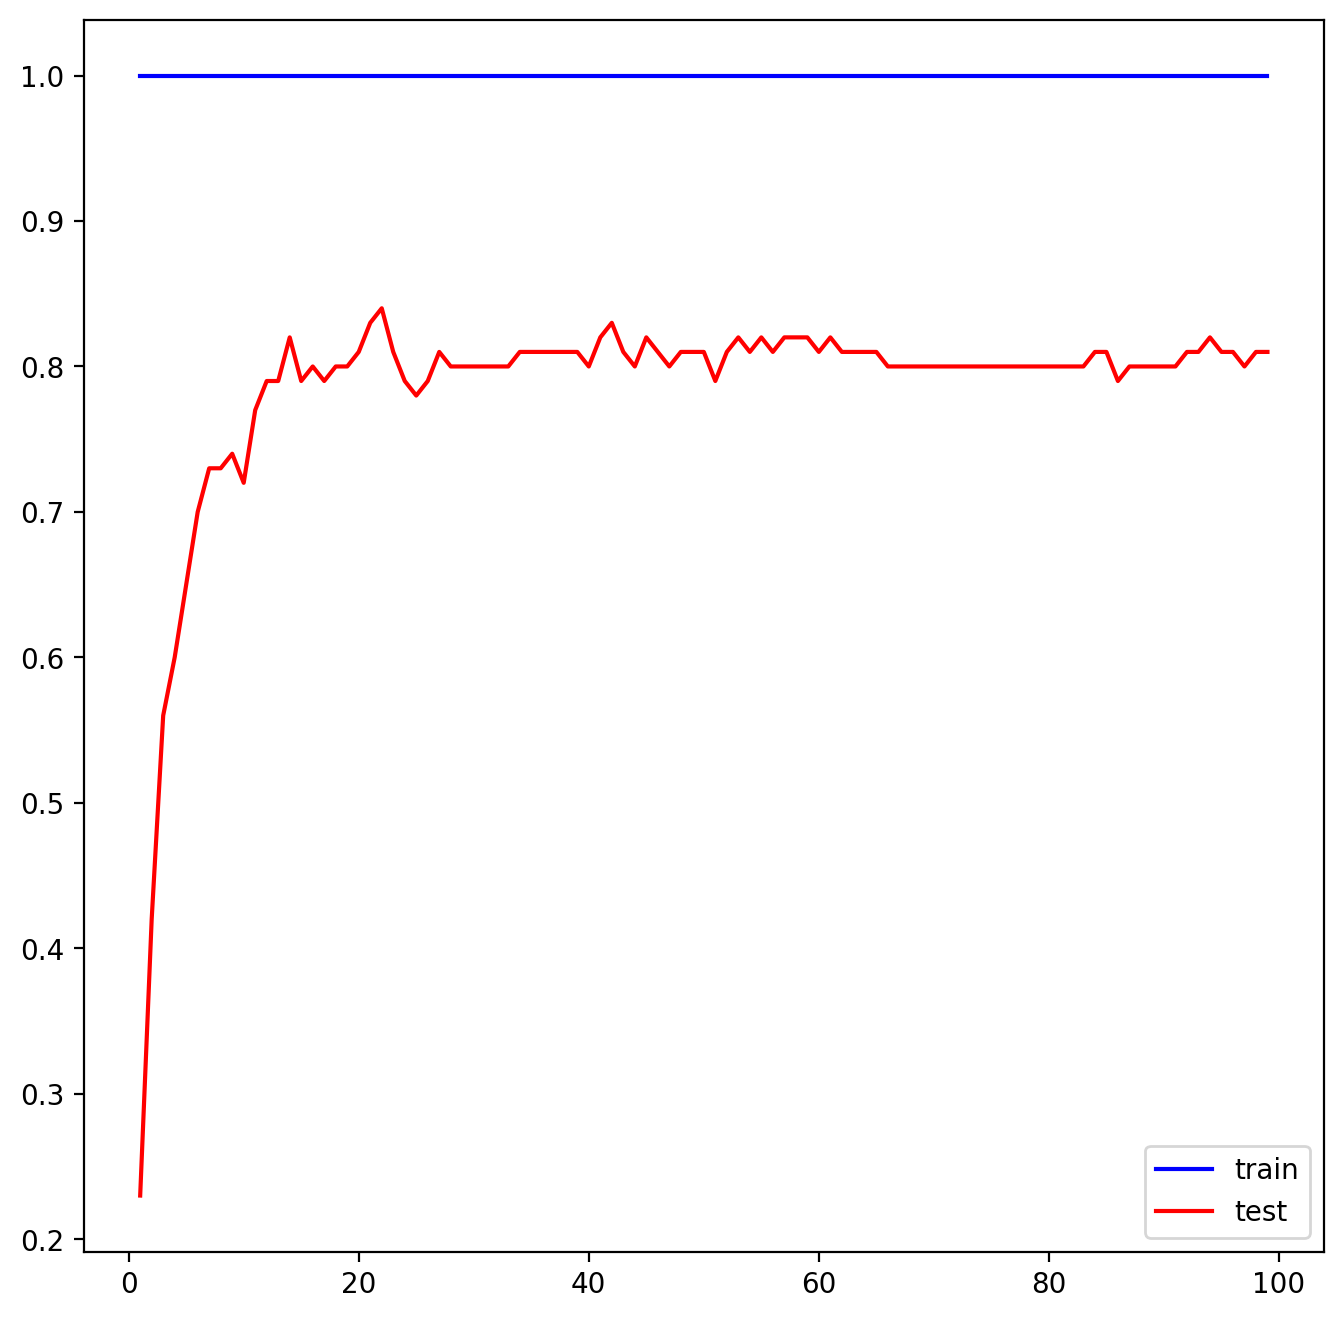

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

K = P_train.shape[1]
dict_params = [{'n_neighbors': [5,10,15,20], 'weights':['uniform','distance']}]
nfold = 3
knn_grid = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=dict_params,cv=nfold)

acc_tr = []
acc_test = []
for k in range(1,K):
  knn_grid.fit(P_train[:,:k+1], Y_train)
  acc_tr.append(knn_grid.score(P_train[:,:k+1], Y_train))
  acc_test.append(knn_grid.score(P_test[:,:k+1], Y_test))

plt.figure()
plt.plot(range(1,K),acc_tr, "b", label="train")
plt.plot(range(1,K),acc_test, "r", label="test")
plt.legend()

#### Exercise 5

Now implement the code to jointly select with a 3-fold CV the optimum number of PCA components and the number of neighbors of the K-NN. Think about the most efficient implementation of this approach.

The optimum value of K is 85
The test performance is 0.78
CPU times: user 30.8 s, sys: 531 ms, total: 31.3 s
Wall time: 19.8 s


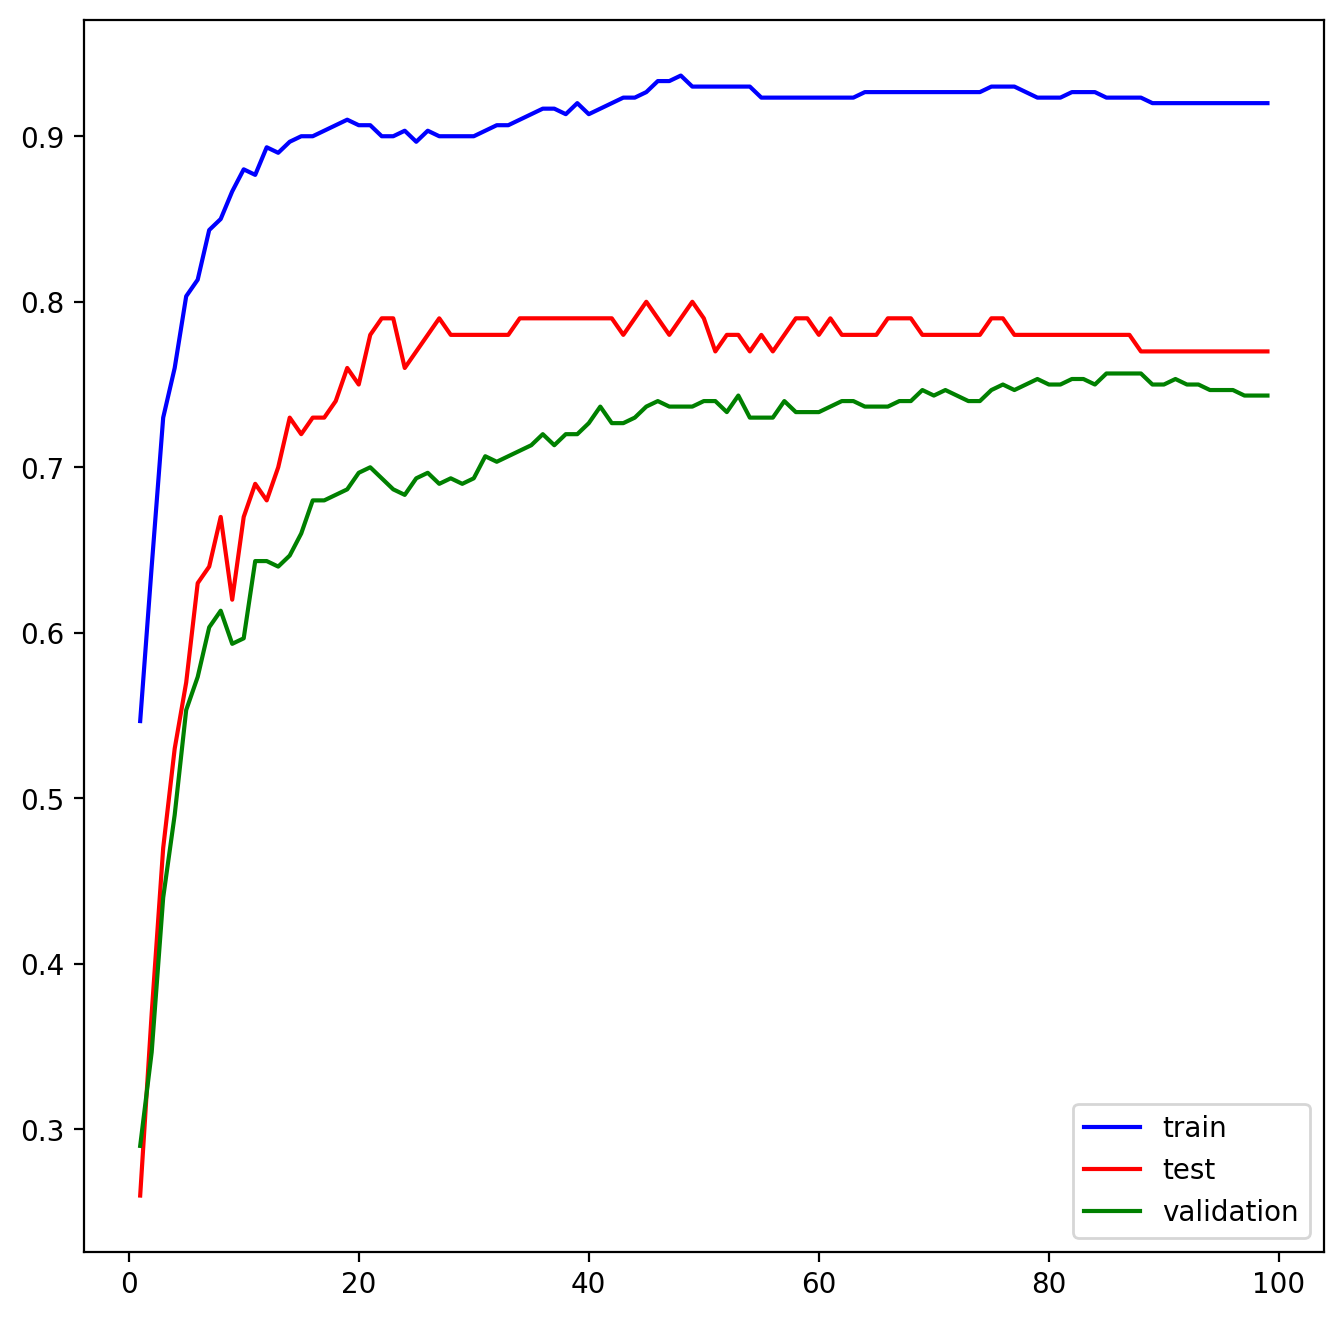

In [15]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

N_feat_max=100

my_pca = PCA(n_components=N_feat_max).fit(X_train)
P_train = my_pca.transform(X_train)
P_test = my_pca.transform(X_test)

K = P_train.shape[1]
dict_params = [{'n_neighbors': [5,10,15,20]}]
nfold = 3
knn_grid = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=dict_params,cv=nfold)

acc_tr = []
acc_val = []
acc_test = []
rang_K = range(1,N_feat_max)
for k in rang_K:
  knn_grid.fit(P_train[:,:k+1], Y_train)
  acc_tr.append(knn_grid.score(P_train[:,:k+1], Y_train))
  acc_test.append(knn_grid.score(P_test[:,:k+1], Y_test))
  acc_val.append(knn_grid.best_score_)

plt.figure()
plt.plot(rang_K,acc_tr, "b", label="train")
plt.plot(rang_K,acc_test, "r", label="test")
plt.plot(rang_K,acc_val, "g", label="validation")
plt.legend()

k_opt = rang_K[np.argmax(np.array(acc_val))]
print('The optimum value of K is %d' %k_opt)

print('The test performance is %2.2f' %acc_test[np.argmax(np.array(acc_val))])

In [16]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.pipeline import Pipeline

pipe = Pipeline([('PCA', PCA()), ('clf', neighbors.KNeighborsClassifier( ))])

# NOTE: we have reduced the range of n_components using a step of 10!!!!!
dict_params = [{'PCA__n_components': range(1,100,10), 'clf__n_neighbors': [5,10,15,20]}]
nfold = 3
knn_grid = GridSearchCV(estimator=pipe, param_grid=dict_params,cv=nfold)
knn_grid.fit(X_train, Y_train)

print('The optimum value of K is %d' %knn_grid.best_params_['PCA__n_components'])

acc_test = knn_grid.score(X_test, Y_test)

print('The test performance is %2.2f' %acc_test)

The optimum value of K is 61
The test performance is 0.78
CPU times: user 21.6 s, sys: 17.6 s, total: 39.2 s
Wall time: 24.3 s


# Probabilistic PCA

The formulation of PCA can be formulated in a probabilistic fashion, defining what we call *Probabilistic PCA* (PPCA), which is a particular class of a *generative probabilistic model* with **latent variables**.



## Generative model

This model considers that the $D$-dimensional observed variable $\mathbf{x}$ is defined by a linear transformation of the $K$-dimensional latent variable $\mathbf{z}$ plus additive Gaussian noise, so that

$$ \mathbf{x}  = \mathbf{W}\mathbf{z}+\mathbf{\mu} +\mathbf{\epsilon}$$

where $\mathbf{z}\in\mathbb{R}^K$ is the low-dimensional latent representation of the observation $\mathbf{x}\in\mathbb{R}^D$, $\mathbf{W}$ is $D\times K$ matrix wich spans a linear subspace within the data space, $\mathbf{\mu}$ is a D-dimensional modeling the mean of the observed data and $\mathbf{\epsilon}$ is a D-dimensional zero-mean Gaussian-distributed noise variable with covariance $\sigma^2 \bf{I}$.

To complete this model, we consider that the prior distribution over $\mathbf{z}$ is

$$p(\mathbf{z})=\mathcal{N}(\mathbf{z}|\mathbf{0},\mathbf{I})$$

So, the probability distribution of each data $\mathbf{x}$, conditioned on the latent variable $\mathbf{z}$ is a Gaussian distribution of the form

$$p(\mathbf{x}|\mathbf{z})=\mathcal{N}(\mathbf{x}|\mathbf{W}\mathbf{z}+\mathbf{\mu},\sigma^2\mathbf{I})$$

This generative process can be summarized as:

  <img align="center" src="http://www.tsc.uc3m.es/~vanessa/Figs_notebooks/ML/PCA/pPCA_1.png" width="70%" >

*Figure from Bishop's book: ``Pattern Recongnition and Machine Learning''*

Note that this framework is based on a mapping from latent space to data space, in contrast to the more conventional view of PCA discussed above.


## Maximum likelihood estimation of $\mathbf{W}$, $\mathbf{\mu}$ and $\sigma$

Now, we want to determine the values of the parameters $\mathbf{W}$,$\mathbf{\mu}$ and $\sigma$ using maximum likelihood (ML). To write down the likelihood function, we need an expression for the marginal distribution of the observed variable $p(\mathbf{x})$. This distribution is again Gaussian and is given by
$$p(\mathbf{x})=\int p(\mathbf{x}|\mathbf{z})p(\mathbf{z}) d\mathbf{z}=\mathcal{N}(\mathbf{x}|\mathbf{\mu},\mathbf{C})$$
where
$$\mathbf{C}=\mathbf{W}\mathbf{W}^T+\sigma^2\mathbf{I}$$



Given a data set $\mathbf{X}=\{\mathbf{x}^{(i)}\}$, the corresponding log-likelihood is

\begin{align}
\log p(\mathbf{X}|\mathbf{\mu},\mathbf{W}\sigma)=\sum_{i=1}^{N}\log p(\mathbf{x}^{(i)}|\mathbf{\mu},\mathbf{W}\sigma)=-\frac{ND}{2}\log(2\pi)-\frac{N}{2}\log|\mathbf{C}|-\frac{1}{2}\sum_{n=1}^{N}(\mathbf{x}^{(i)}-\mathbf{\mu})^T\mathbf{C}^{-1}(\mathbf{x}^{(i)}-\mathbf{\mu})
\end{align}

Maximization w.r.t. $\mathbf{W}$,$\mathbf{\mu}$ and $\sigma$ can be done by either using SGD algorithms via Pytorch/Tensorflow, using the iterative [Expectation Maximization algorithm](http://cs229.stanford.edu/notes2021fall/cs229-notes8.pdf) to iteratively estimate the solution or setting derivatives to zero and compute the optimal value for these parameters.



### Analytical solution

By computing gradients and equalize them to zero, it can be shown that

\begin{align}
\mathbf{\mu}_{\text{ML}} &= \overline{\mathbf{x}}=\frac{1}{N}\sum_{i=1}^{N}\mathbf{x}^{(i)}\\
\\
\sigma^2_{\text{ML}} &= \frac{1}{D-K}\sum_{i=M+1}^{D}\lambda_i\\
\\
\mathbf{W}_{\text{ML}} &=\mathbf{U}_{K} \left( \mathbf{L}_{K} - \sigma^2_{\text{ML}}\mathbf{I}\right)^{1/2} \mathbf{R}
\end{align}

where
* $\mathbf{\mu}_{\text{ML}}$ is the mean of the observed data (as expected).

* $\sigma^2_{\text{ML}}$ is the variance associated to the discarded dimensions

* The solution for $\mathbf{W}_{\text{ML}}$ entails several terms:
  * $\mathbf{U}_{K}$ which is the matrix with the $K$-most dominant eigenvectors of the empirical covariance matrix $\mathbf{C_{XX}}$

  * $\mathbf{L}_{K}$ is a $K\times K$ diagonal matrix with the corresponding $K$ most dominant eigenvalues $\lambda_1,\ldots,\lambda_K$ of $\mathbf{C_{XX}}$

  * $\mathbf{R}$ is an arbitrary $K\times K$ orthogonal rotation matrix: this matrix indicates that any rotation of this space is a valid solution.


## The posterior distribution

Conventional PCA is generally formulated as a projection of points from the $D$-dimensional data space onto an $K$-dimensional linear subspace. Probabilistic PCA, however, is most expressed as a mapping from the latent space into the data space.

For applications such as visualization and data compression, we can reverse this mapping using Bayes’ theorem. Any point x in data space can then be summarized by its posterior mean and covariance in latent space.

So, to compute the posterior, we have that:
$$p(\mathbf{z}|\mathbf{x}) = \frac{p(\mathbf{x}|\mathbf{z})p(\mathbf{z})}{p(\mathbf{x})}$$

As everything is gaussian, this posterior distributon is also a Gaussian distribution and is given by

$$p(\mathbf{z}|\mathbf{x}) = \mathcal{N}(\mathbf{z}|\mathbf{M}^{-1}\mathbf{W}^T(\mathbf{x}-\mathbf{\mu}),\sigma^{-2}\mathbf{M})$$
where

$$\mathbf{M} = \mathbf{W}^T\mathbf{W}+\sigma^2\mathbf{I}$$

So, considering the ML estimation of the model parameters, the mean of the proyected data for data observation is computed by:

$$E[\mathbf{z}_i|\mathbf{x}_i] = \mathbf{M}_{ML}^{−1} \mathbf{W}_{ML}^{\top} (\mathbf{x}_i − \mu_{ML})$$

where $\mathbf{M}_{ML} =\mathbf{W}_{ML}^T\mathbf{W}_{ML}+\sigma_{ML}^2\mathbf{I}$.

Note that if $\sigma^2$ is set to zero and $\mathbf{R}=\mathbf{I}$, we have that $\mathbf{W} = \mathbf{U}_{K}\mathbf{L} ^{1/2} $, $\mathbf{M}_{ML} =\mathbf{W}_{ML}^T\mathbf{W}_{ML}$, so

$$E[\mathbf{z}_i|\mathbf{x}_i] = \mathbf{U}_{K}\mathbf{L} ^{1/2} (\mathbf{x}_i − \mu) $$

So we have that the projection matrix is given by the most relevant eigenvectors of the covariance matrix (as the original version of the PCA), but reescaled by the variance parameters (the eigenvalues).  

### Example: Probabilistic PCA over images of Hand-written digits


#### Load dataset

In [17]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

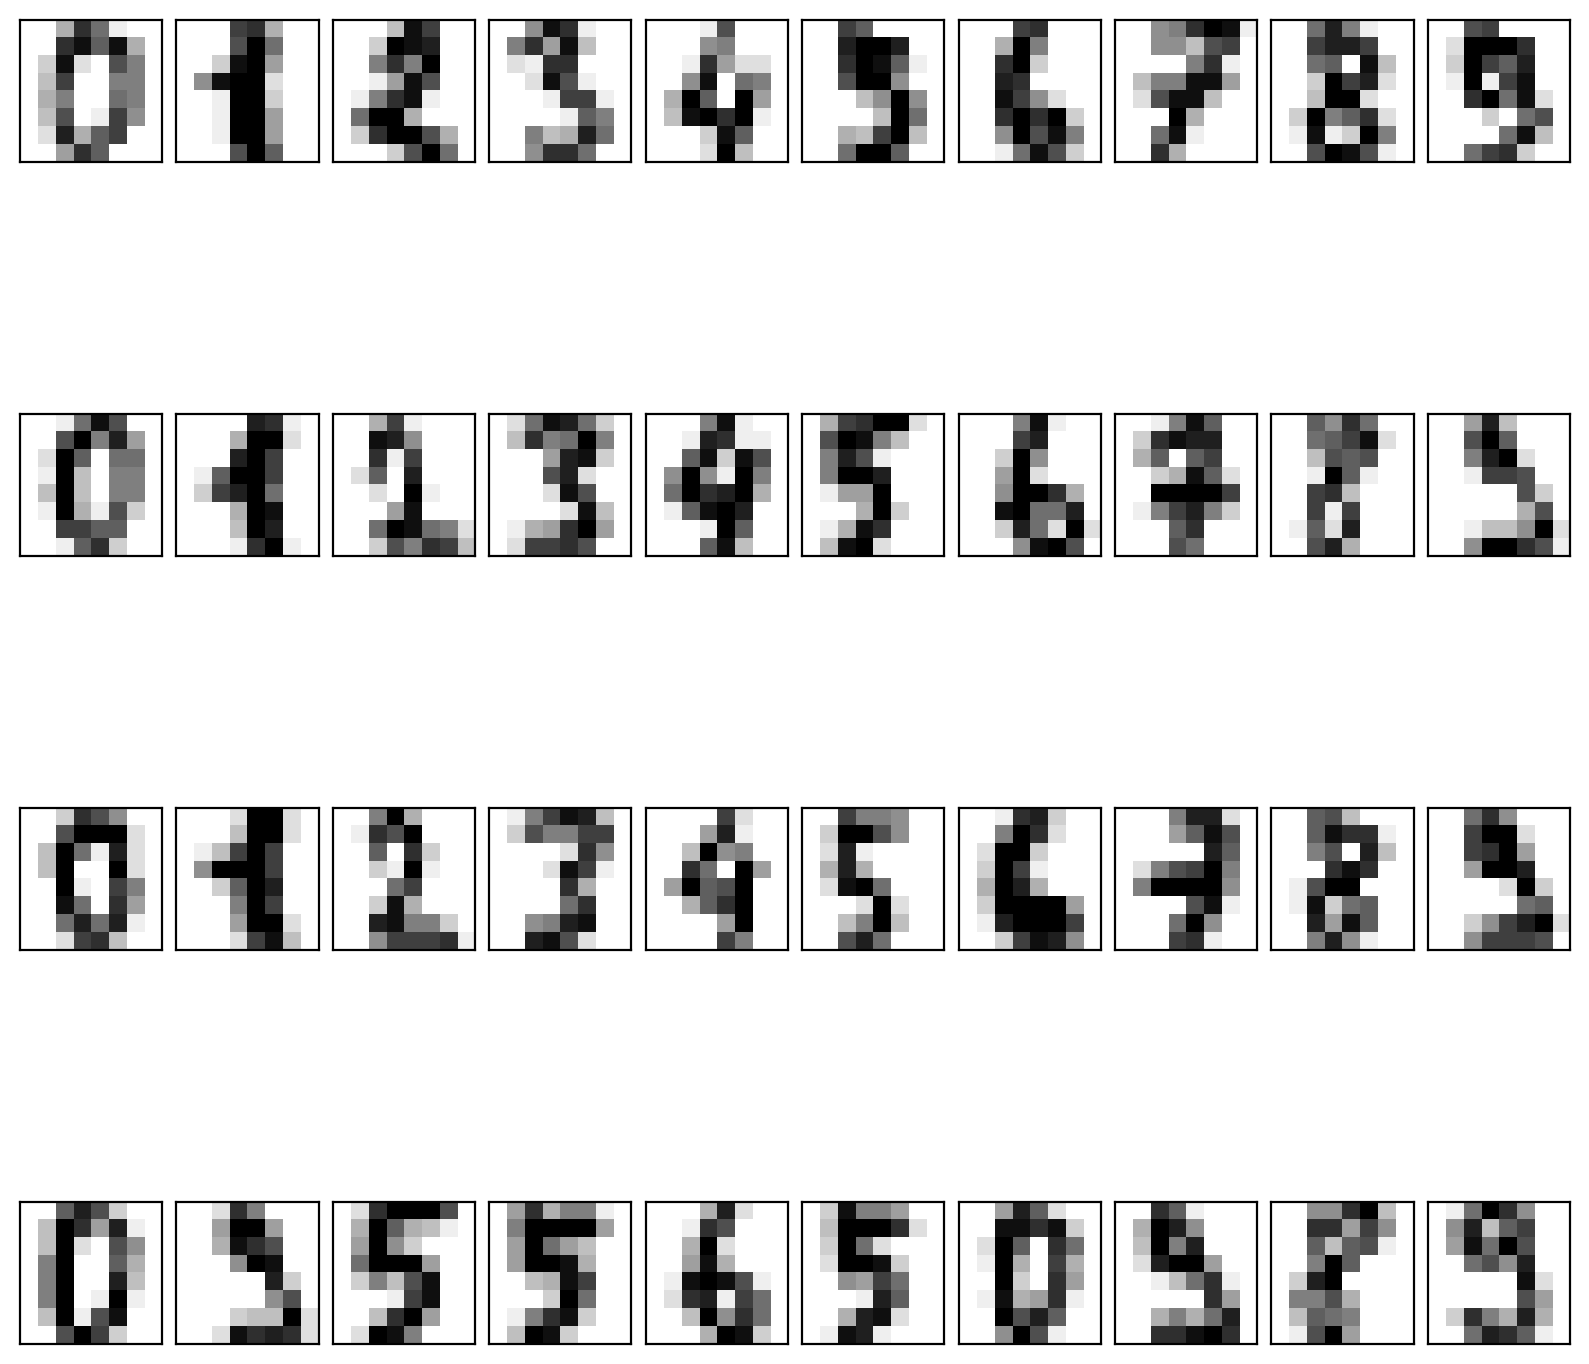

In [18]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

plot_digits(digits.data)

Let's compute the analytical solution for a 2D latent space. Remind:


\begin{align}
\mathbf{\mu}_{\text{ML}} &= \overline{\mathbf{x}}=\frac{1}{N}\sum_{i=1}^{N}\mathbf{x}^{(i)}\\
\\
\sigma^2_{\text{ML}} &= \frac{1}{D-M}\sum_{i=M+1}^{D}\lambda_i\\
\\
\mathbf{W}_{\text{ML}} &=\mathbf{U}_{M} \left( \mathbf{L}_{M} - \sigma^2_{\text{ML}}\mathbf{I}\right)^{1/2} \mathbf{R}
\end{align}

So, let's start computing the covariance matrix of the data and analyzing the eigenvalues

Text(0.5, 0, 'Eigenvalue')

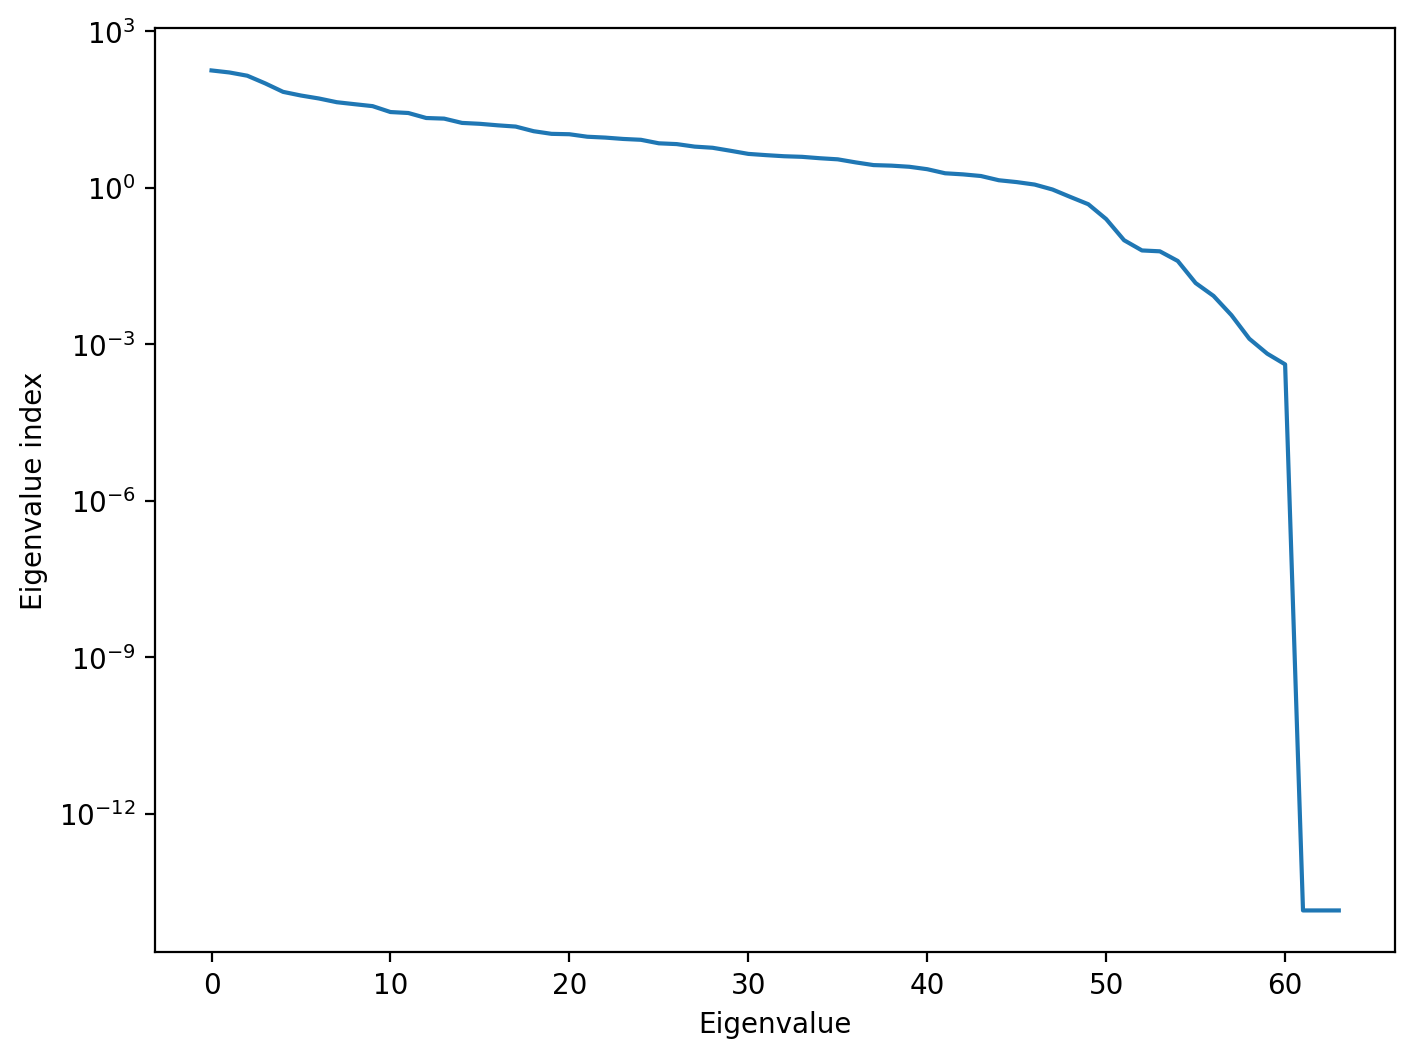

In [19]:
plt.figure(figsize=(8,6))

N,D = digits.data.shape

S = np.cov(digits.data.T)

u, s, vh = np.linalg.svd(S)

plt.semilogy(s)
plt.ylabel('Eigenvalue index')
plt.xlabel('Eigenvalue')

In [20]:
n_components = 2

mu_ML = np.mean(digits.data,0)
U_m = u[:,:n_components]
L_m = np.diag(s[:n_components])

sigma2_ML = 1./(D-n_components)*np.sum(s[n_components:])

#sigma2_ML = 1.0

W_ML = U_m @(L_m - sigma2_ML*np.eye(n_components))**(1/2)@np.eye(n_components)  # We consider R is the identity



Now, let's use the posterior mean, to project the data

In [21]:
M = W_ML.T@W_ML + sigma2_ML*np.eye(n_components)

mean_projected = np.transpose(np.linalg.pinv(M)@W_ML.T@(digits.data-mu_ML).T)

And now we plot the 2D projection of the numbers ...

<ipython-input-22-4cd6ebabdf3d>:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Spectral', 10))


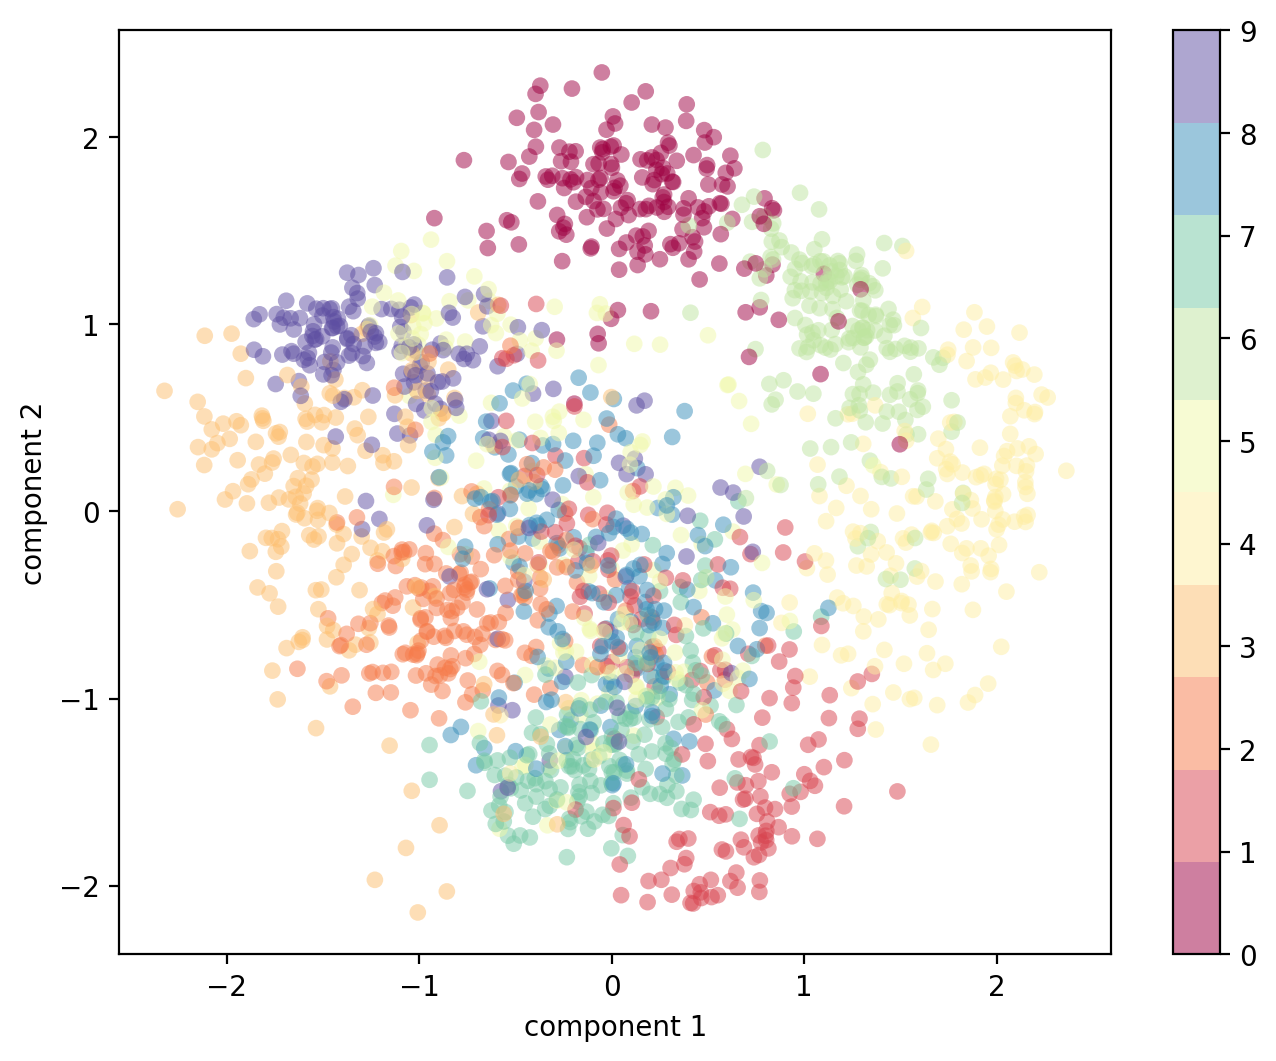

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(mean_projected[:, 0], mean_projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### Sampling from the model

Now, that we have estimated the model parameters, we can use the generative model

$$ \mathbf{x}  = \mathbf{W}\mathbf{z}+\mathbf{\mu} +\epsilon$$

where

$$p(\mathbf{z})=\mathcal{N}(\mathbf{z}|\mathbf{0},\mathbf{I})$$

and

$$p(\mathbf{\epsilon})=\mathcal{N}(\mathbf{\epsilon}|\mathbf{0},\sigma^2 \bf{I})$$

to sample from the model, with $\mathbf{W}=\mathbf{W}_{ML}$, $\mathbf{\mu}=\mathbf{\mu}_{ML}$ and $\sigma=\sigma_{ML}$, to observe the quality of the pdf estimation ...


In [23]:
n_samples = 40

s = np.random.randn(n_components,n_samples)

mean_x_given_s = W_ML@s + mu_ML.reshape([-1,1])

samples = mean_x_given_s + np.random.randn(64,n_samples)


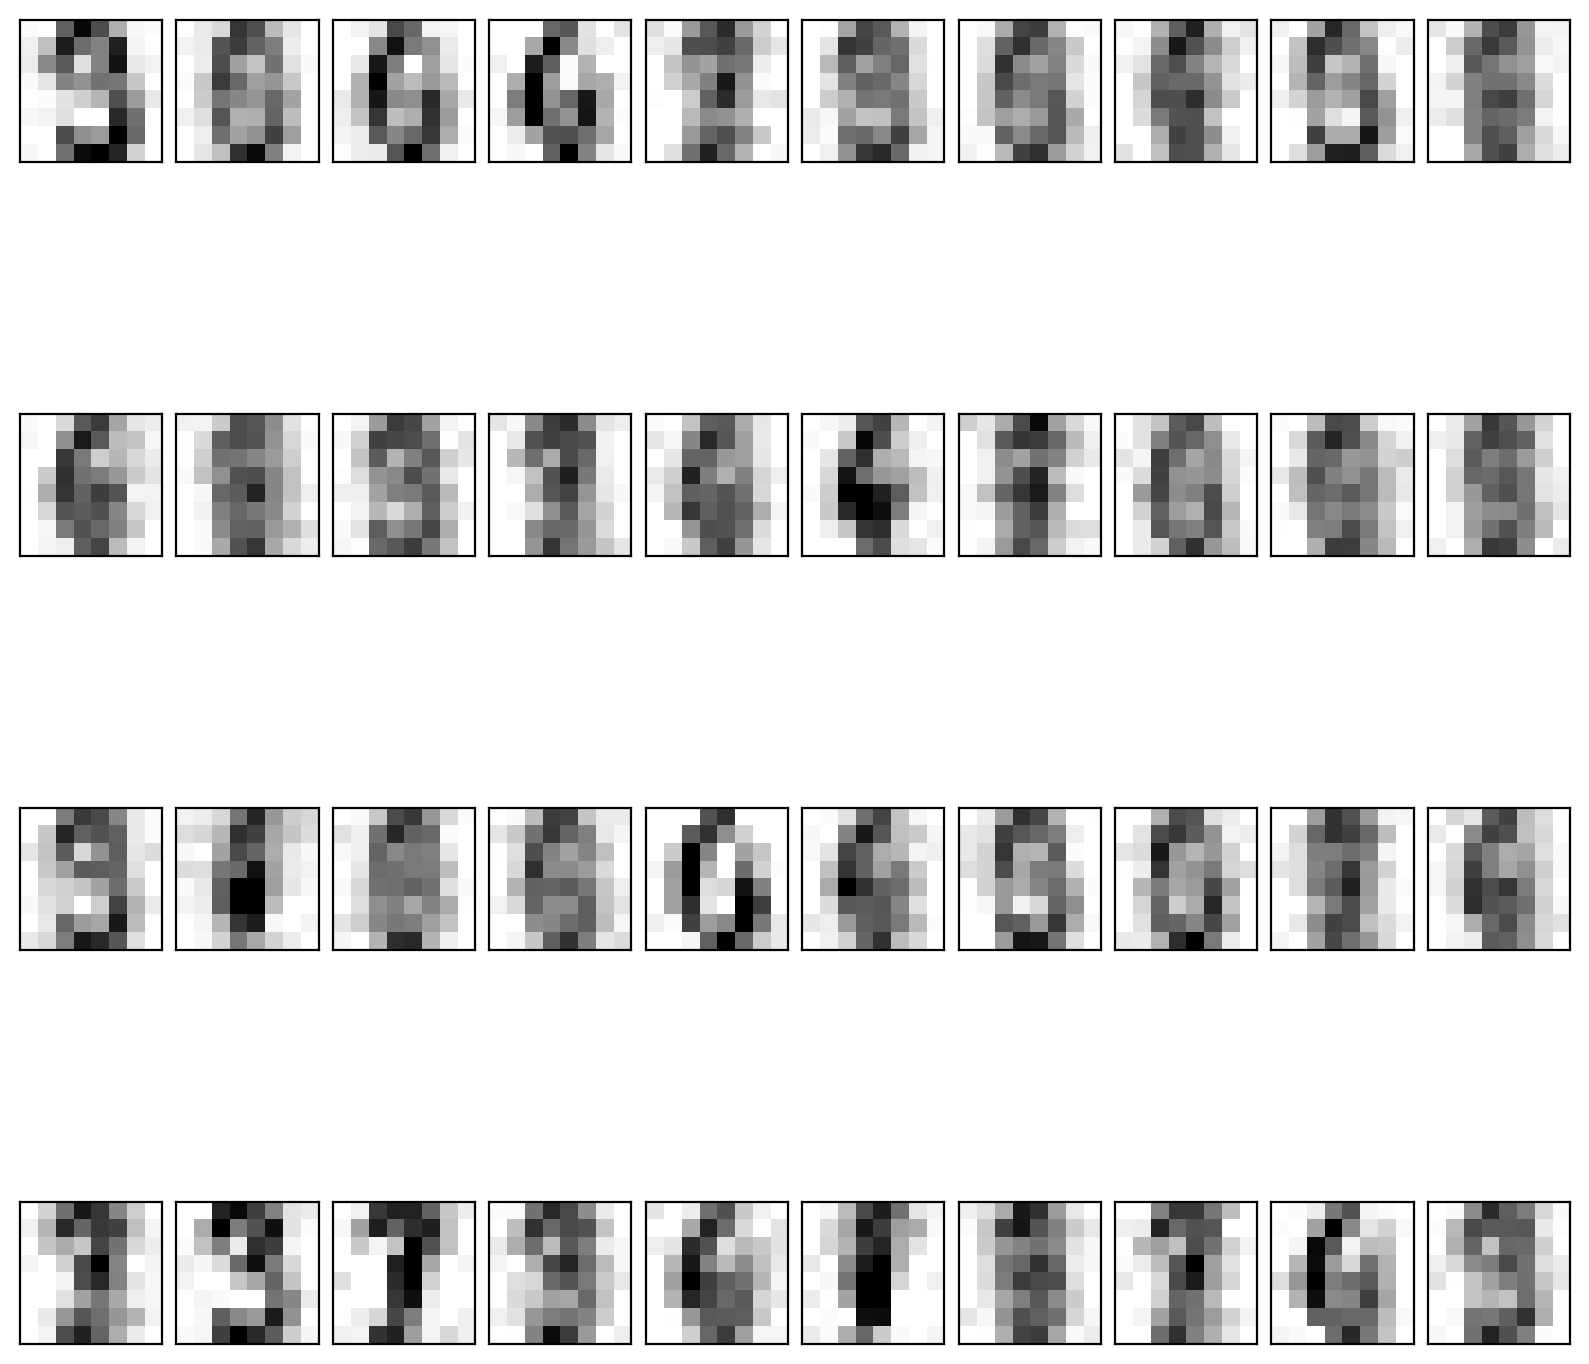

In [24]:
plot_digits(samples.T)

Let's increase the dimension of the latent space to see if image generation improves ...

In [25]:
u, s, vh = np.linalg.svd(S)

n_components = 40

mu_ML = np.mean(digits.data,0)
U_m = u[:,:n_components]
L_m = np.diag(s[:n_components])

sigma2_ML = 1./(D-n_components)*np.sum(s[n_components:])

sigma2_ML = 1.0

W_ML = U_m @(L_m - sigma2_ML*np.eye(n_components))**(1/2)@np.eye(n_components)


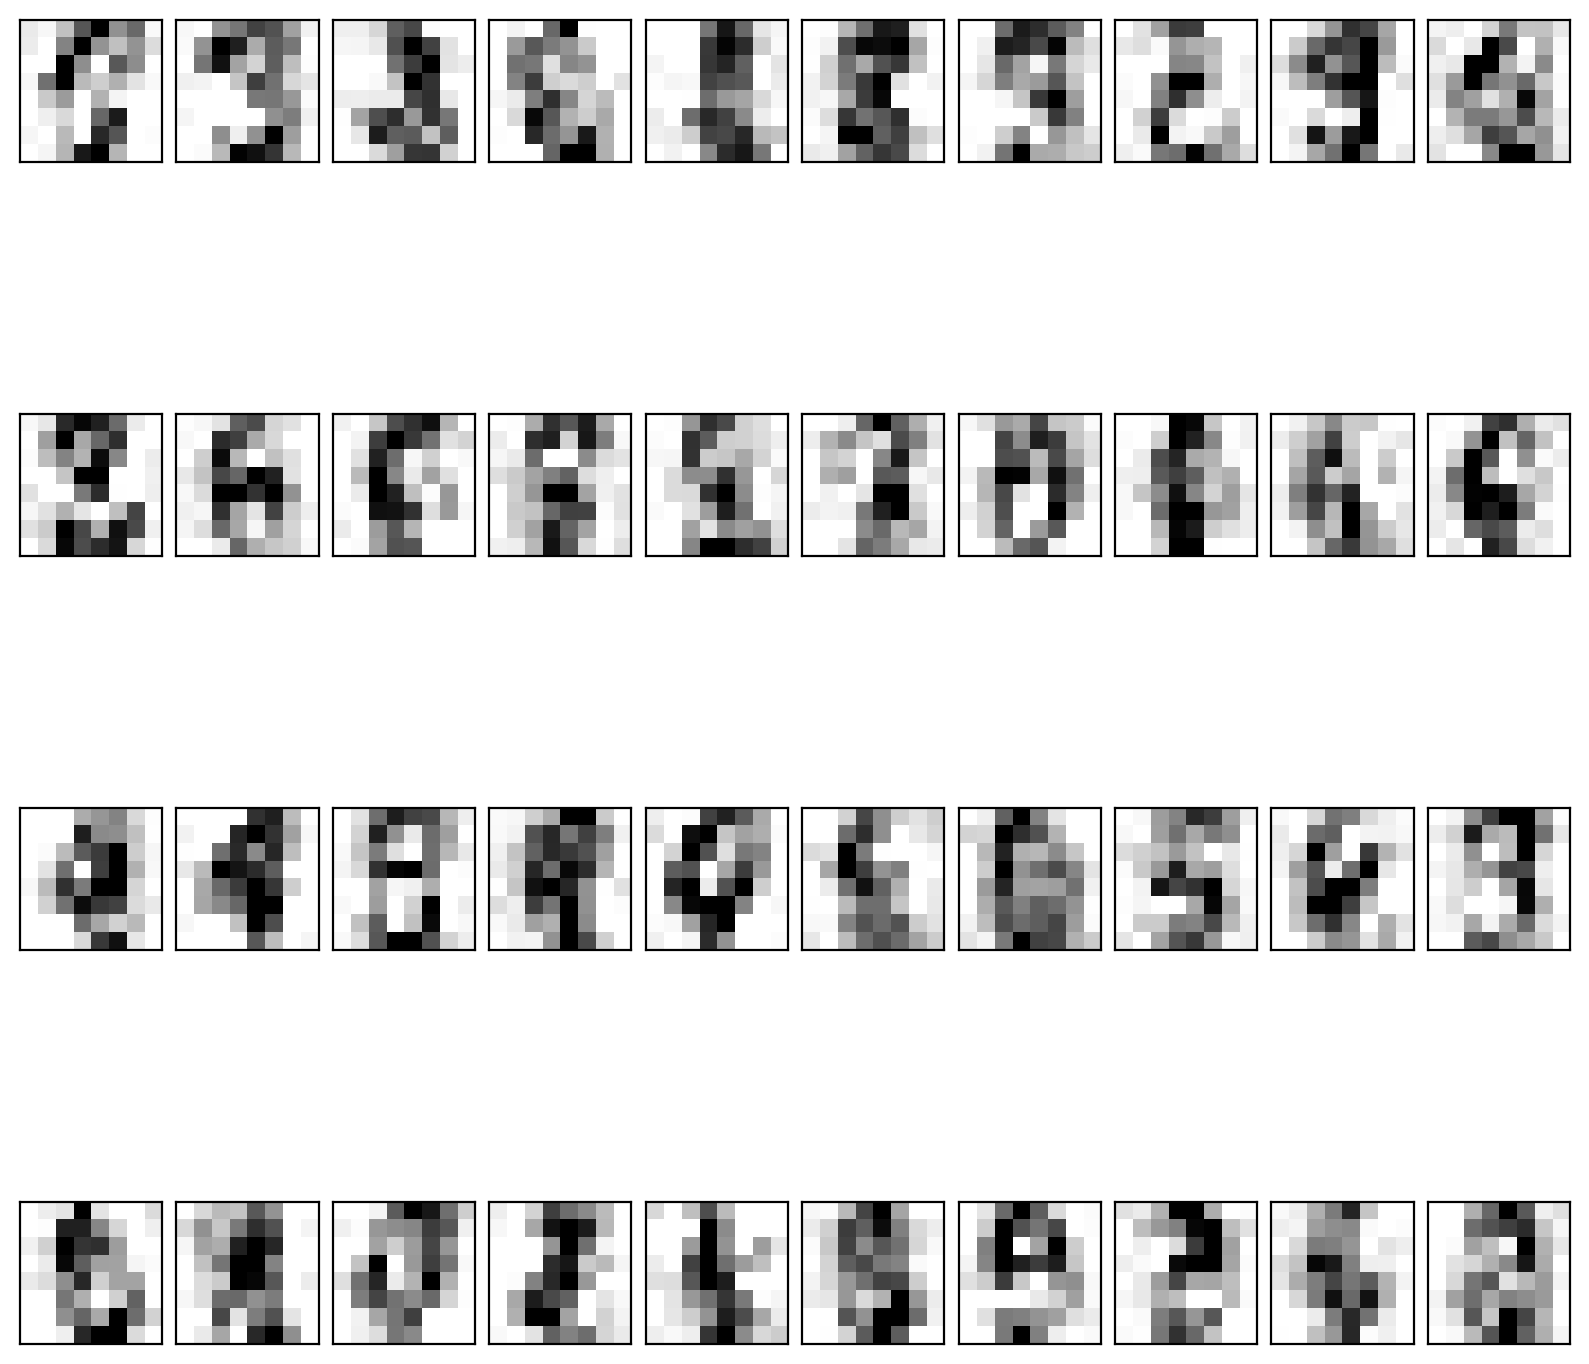

In [26]:
n_samples = 40

s = np.random.randn(n_components,n_samples)

mean_x_given_s = W_ML@s + mu_ML.reshape([-1,1])

samples = mean_x_given_s + np.random.randn(64,n_samples)

plot_digits(samples.T)

It certainly improves, but there's room for improvement...

##Apply PPCA to face detection


1. Compute PPCA proyections and represent the two principal components.

2. Train a K-NN with the projected data and select by CV the optimum number of new features and the K parameter

In [27]:
from sklearn.decomposition import FactorAnalysis

# <SOL>
my_ppca = FactorAnalysis(n_components=N_feat_max, random_state=0).fit(X_train)
P_train = my_ppca.transform(X_train)
P_test = my_ppca.transform(X_test)

dim_train = P_train.shape[1]
dim_test = P_test.shape[1]

# </SOL>

print('Dimensions of training data are: ' + str(dim_train))
print('Dimensions of test data are: ' + str(dim_test))

Dimensions of training data are: 100
Dimensions of test data are: 100


Text(0, 0.5, 'Extracted Feature 2')

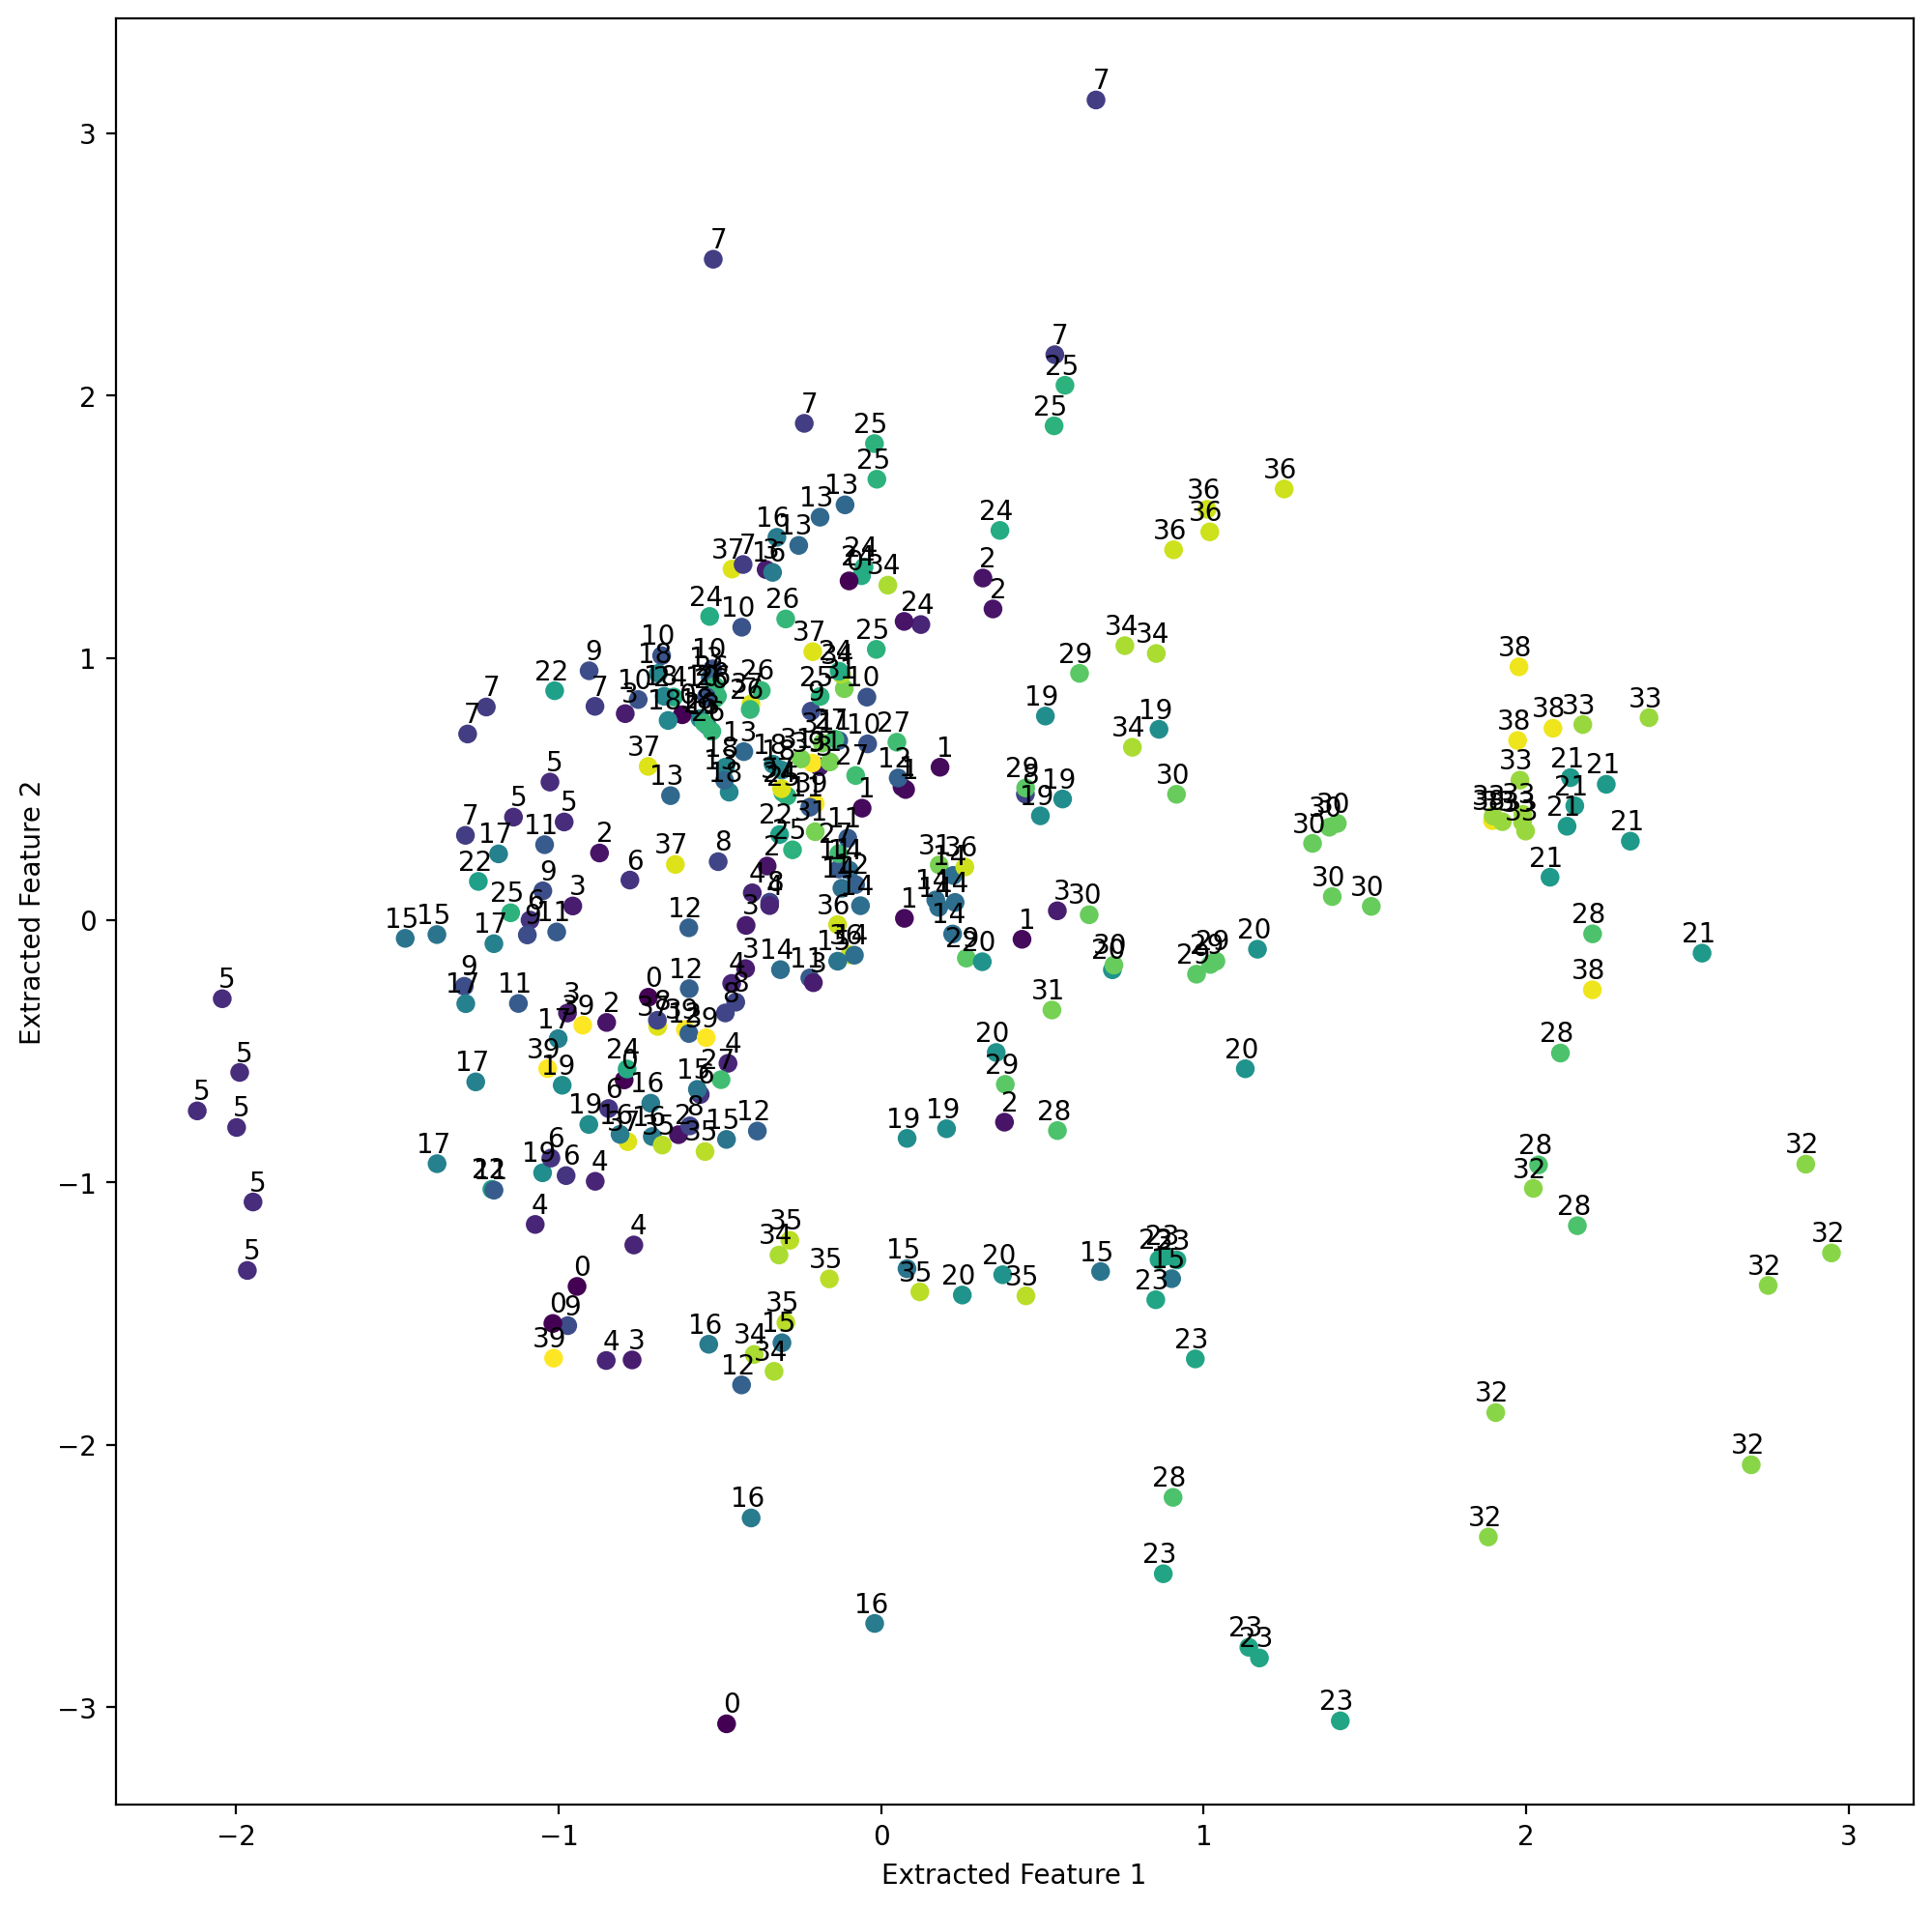

In [28]:


X_train_pca2 = P_train[:,:2]
plt.figure(figsize=(12,12))
plt.scatter(X_train_pca2[:, 0], X_train_pca2[:, 1], c=Y_train)

for i in range(len(X_train_pca2)):
        plt.annotate(Y_train[i],
                     xy=(X_train_pca2[i,0], X_train_pca2[i,1]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

plt.xlabel('Extracted Feature 1')
plt.ylabel('Extracted Feature 2')

The optimum value of K is 17
The test performance is 0.86
CPU times: user 29.9 s, sys: 205 ms, total: 30.1 s
Wall time: 18.7 s


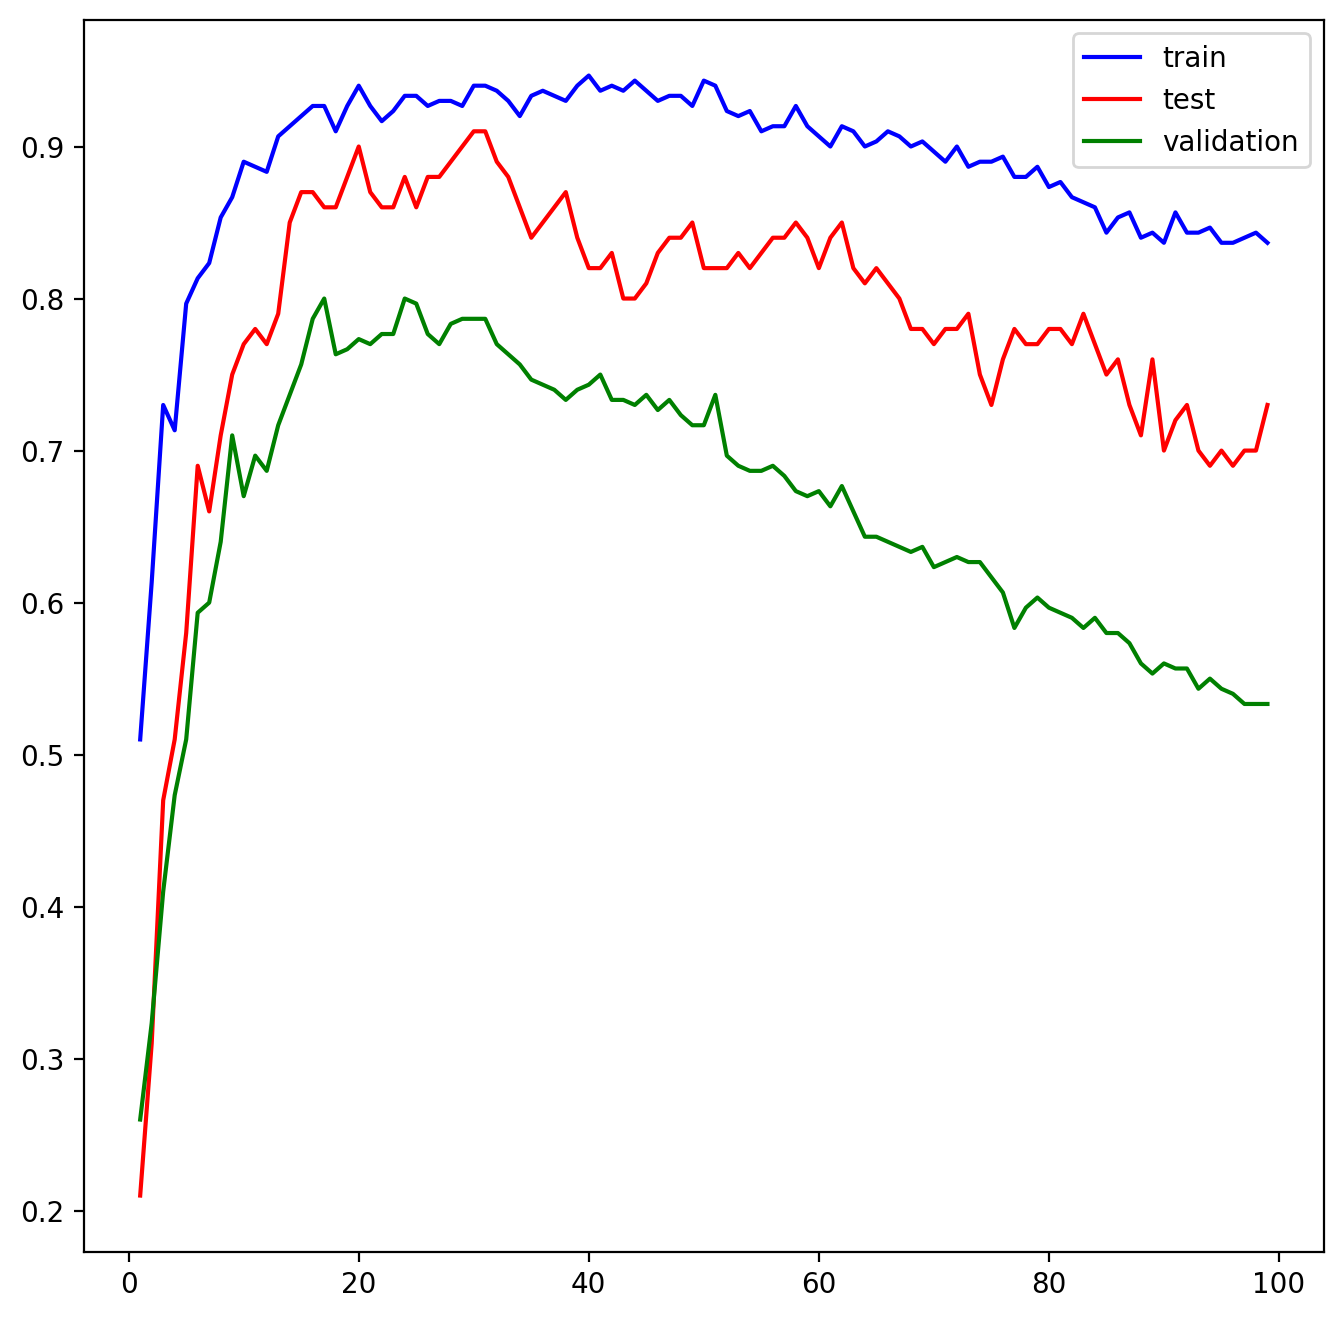

In [29]:
%%time

from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

K = P_train.shape[1]
dict_params = [{'n_neighbors': [5,10,15,20]}]
nfold = 3
knn_grid = GridSearchCV(estimator=neighbors.KNeighborsClassifier( ), param_grid=dict_params,cv=nfold)

acc_tr = []
acc_val = []
acc_test = []
rang_K = range(1,N_feat_max)
for k in rang_K:
  knn_grid.fit(P_train[:,:k+1], Y_train)
  acc_tr.append(knn_grid.score(P_train[:,:k+1], Y_train))
  acc_test.append(knn_grid.score(P_test[:,:k+1], Y_test))
  acc_val.append(knn_grid.best_score_)

plt.figure()
plt.plot(rang_K,acc_tr, "b", label="train")
plt.plot(rang_K,acc_test, "r", label="test")
plt.plot(rang_K,acc_val, "g", label="validation")
plt.legend()

k_opt = rang_K[np.argmax(np.array(acc_val))]
print('The optimum value of K is %d' %k_opt)

print('The test performance is %2.2f' %acc_test[np.argmax(np.array(acc_val))])